In [2]:
import sys
sys.path.append("../") # go to parent dir

import re

from s2v_dqn.graph_type import GraphType
from s2v_dqn.interaction import train
from s2v_dqn.utils import replay_graphs

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
PROBLEM = 'MVC'

In [4]:
mvc_base_params = {
    'embedding_layers': 5,
    'nstep': 1,
#     'lr_config': [[0, 1e-3], [0.5, 1e-4], [0.75, 1e-5]],
    'lr_config': [[0, 1e-3], [0.7, 1e-4]],
#     'lr_config': [[0, 1e-3], [0.05, 1e-4], [0.9, 1e-5]],
    'eps_start': 1.00,
    'eps_end': 0.01,
    'eps_end_at_episode': 0.9,
    'n_episodes': 3000,
    'validate_each': 100,
    'validate_at_start': True,
    'print_train_metrics_each': 10,
    'batch_size': 128,
    'exact_solution_max_size': 20,
    'discount_factor': 1.0,
    'warmup_steps': 1000,
    'update_params_each': 1,
    'target_update': 'soft',
    'double_dqn': True,
    'tau': 5e-3,
}
n_runs = 10

In [4]:
final_agents = []

tau 0.005
update_target_each 500
{'problem': 'mvc', 'embedding_layers': 5, 'nstep': 1, 'lr_config': [[0, 0.001], [0.7, 0.0001]], 'eps_start': 1.0, 'eps_end': 0.01, 'eps_end_at_episode': 0.8, 'n_episodes': 3000, 'validate_each': 100, 'validate_at_start': True, 'print_train_metrics_each': 10, 'batch_size': 128, 'exact_solution_max_size': 20, 'discount_factor': 1.0, 'warmup_steps': 1000, 'update_params_each': 1, 'target_update': 'soft', 'double_dqn': True, 'tau': 0.005, 'n_vertices': 10, 'graph_type': <GraphType.BARABASI_ALBERT: 3>, 'graph_params': {'m': 4}}
Starting run #1/10...
Starting run #2/10...
Starting run #3/10...
Starting run #4/10...
Starting run #5/10...
Starting run #6/10...
Starting run #7/10...
Starting run #8/10...
Starting run #9/10...
Starting run #10/10...
Min of avg validation score across episodes: 1.0016666666666665


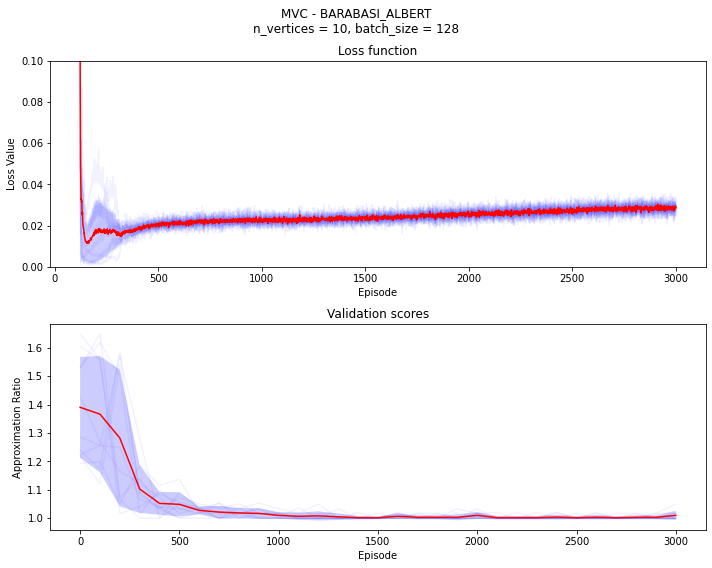

CPU times: user 3h 3min 21s, sys: 2min 4s, total: 3h 5min 26s
Wall time: 31min 45s


In [11]:
%%time
params = {
    **mvc_base_params,
    'n_vertices': 10,
    'graph_type': GraphType.BARABASI_ALBERT,
    'graph_params': {'m': 4},
}
experiment_idx = 1
agents = train(n_runs, params, PROBLEM, experiment_idx)
final_agents.append(final_agents)

{'problem': 'mvc', 'embedding_layers': 5, 'nstep': 1, 'lr_config': [[0, 0.001], [0.7, 0.0001]], 'eps_start': 1.0, 'eps_end': 0.01, 'eps_end_at_episode': 0.8, 'n_episodes': 3000, 'validate_each': 100, 'validate_at_start': True, 'print_train_metrics_each': 10, 'batch_size': 128, 'exact_solution_max_size': 20, 'discount_factor': 1.0, 'warmup_steps': 1000, 'update_params_each': 1, 'target_update': 'soft', 'double_dqn': True, 'tau': 0.005, 'n_vertices': 10, 'graph_type': <GraphType.ERDOS_RENYI: 2>, 'graph_params': {'p': 0.15}}
Starting run #1/10...


/home/tiago/anaconda3/lib/python3.8/site-packages/torch/nn/init.py:453: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


Starting run #2/10...
Starting run #3/10...
Starting run #4/10...
Starting run #5/10...
Starting run #6/10...
Starting run #7/10...
Starting run #8/10...
Starting run #9/10...
Starting run #10/10...
Min of avg validation score across episodes: 1.3036666666666665


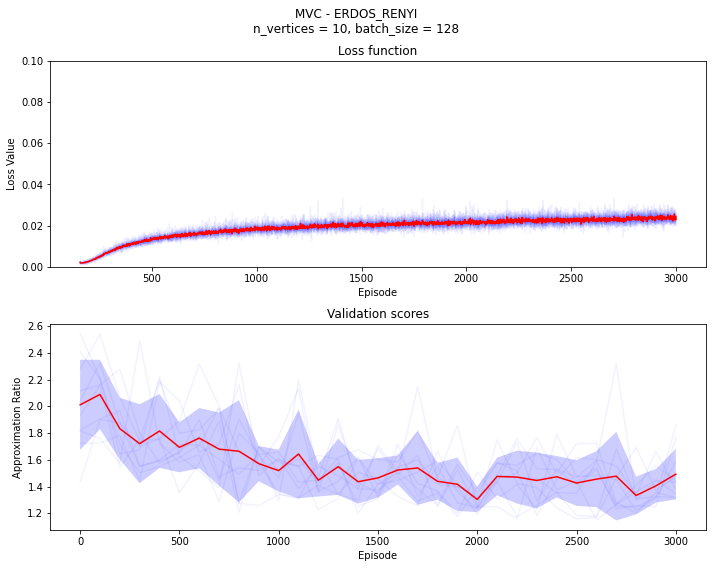

CPU times: user 2h 20min 37s, sys: 2min, total: 2h 22min 37s
Wall time: 24min 32s


In [12]:
%%time
params = {
    **mvc_base_params,
    'n_vertices': 10,
    'graph_type': GraphType.ERDOS_RENYI,
    'graph_params': {'p': 0.15},
}
experiment_idx = 2
agents = train(n_runs, params, PROBLEM, experiment_idx)
final_agents.append(final_agents)

{'problem': 'mvc', 'embedding_layers': 5, 'nstep': 1, 'lr_config': [[0, 0.001], [0.7, 0.0001]], 'eps_start': 1.0, 'eps_end': 0.01, 'eps_end_at_episode': 0.8, 'n_episodes': 3000, 'validate_each': 100, 'validate_at_start': True, 'print_train_metrics_each': 10, 'batch_size': 128, 'exact_solution_max_size': 20, 'discount_factor': 1.0, 'warmup_steps': 1000, 'update_params_each': 1, 'target_update': 'soft', 'double_dqn': True, 'tau': 0.005, 'n_vertices': 10, 'graph_type': <GraphType.ERDOS_RENYI: 2>, 'graph_params': {'p': 0.3}}
Starting run #1/10...


/home/tiago/anaconda3/lib/python3.8/site-packages/torch/nn/init.py:453: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


Starting run #2/10...
Starting run #3/10...
Starting run #4/10...
Starting run #5/10...
Starting run #6/10...
Starting run #7/10...
Starting run #8/10...
Starting run #9/10...
Starting run #10/10...
Min of avg validation score across episodes: 1.0823333333333334


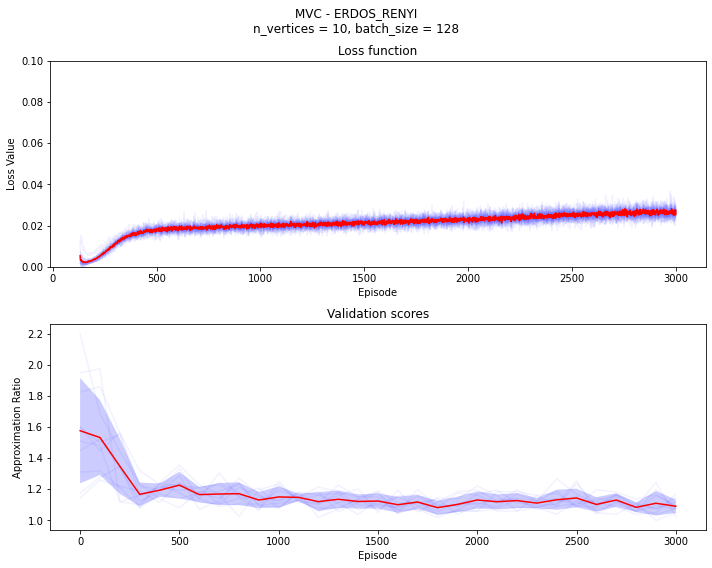

CPU times: user 2h 41min 52s, sys: 1min 58s, total: 2h 43min 50s
Wall time: 27min 4s


In [13]:
%%time
params = {
    **mvc_base_params,
    'n_vertices': 10,
    'graph_type': GraphType.ERDOS_RENYI,
    'graph_params': {'p': 0.30},
}
experiment_idx = 3
agents = train(n_runs, params, PROBLEM, experiment_idx)
final_agents.append(final_agents)

{'problem': 'mvc', 'embedding_layers': 5, 'nstep': 1, 'lr_config': [[0, 0.001], [0.7, 0.0001]], 'eps_start': 1.0, 'eps_end': 0.01, 'eps_end_at_episode': 0.8, 'n_episodes': 3000, 'validate_each': 100, 'validate_at_start': True, 'print_train_metrics_each': 10, 'batch_size': 128, 'exact_solution_max_size': 20, 'discount_factor': 1.0, 'warmup_steps': 1000, 'update_params_each': 1, 'target_update': 'soft', 'double_dqn': True, 'tau': 0.005, 'n_vertices': 15, 'graph_type': <GraphType.BARABASI_ALBERT: 3>, 'graph_params': {'m': 4}}
Starting run #1/10...


/home/tiago/anaconda3/lib/python3.8/site-packages/torch/nn/init.py:453: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


Starting run #2/10...
Starting run #3/10...
Starting run #4/10...
Starting run #5/10...
Starting run #6/10...
Starting run #7/10...
Starting run #8/10...
Starting run #9/10...
Starting run #10/10...
Min of avg validation score across episodes: 1.0079166666666666


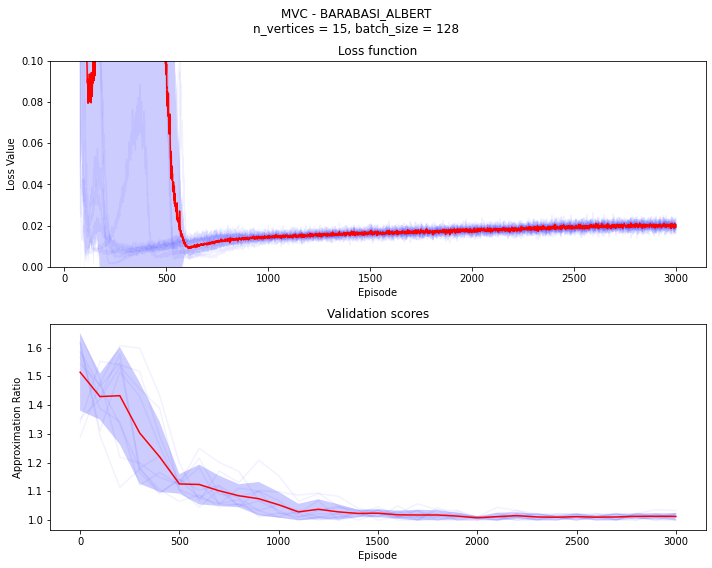

CPU times: user 4h 46min 5s, sys: 2min 11s, total: 4h 48min 16s
Wall time: 44min 57s


In [14]:
%%time
params = {
    **mvc_base_params,
    'n_vertices': 15,
    'graph_type': GraphType.BARABASI_ALBERT,
    'graph_params': {'m': 4},
}
experiment_idx = 4
agents = train(n_runs, params, PROBLEM, experiment_idx)
final_agents.append(final_agents)

{'problem': 'mvc', 'embedding_layers': 5, 'nstep': 1, 'lr_config': [[0, 0.001], [0.7, 0.0001]], 'eps_start': 1.0, 'eps_end': 0.01, 'eps_end_at_episode': 0.8, 'n_episodes': 3000, 'validate_each': 100, 'validate_at_start': True, 'print_train_metrics_each': 10, 'batch_size': 128, 'exact_solution_max_size': 20, 'discount_factor': 1.0, 'warmup_steps': 1000, 'update_params_each': 1, 'target_update': 'soft', 'double_dqn': True, 'tau': 0.005, 'n_vertices': 15, 'graph_type': <GraphType.ERDOS_RENYI: 2>, 'graph_params': {'p': 0.15}}
Starting run #1/10...


/home/tiago/anaconda3/lib/python3.8/site-packages/torch/nn/init.py:453: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


Starting run #2/10...
Starting run #3/10...
Starting run #4/10...
Starting run #5/10...
Starting run #6/10...
Starting run #7/10...
Starting run #8/10...
Starting run #9/10...
Starting run #10/10...
Min of avg validation score across episodes: 1.1513571428571427


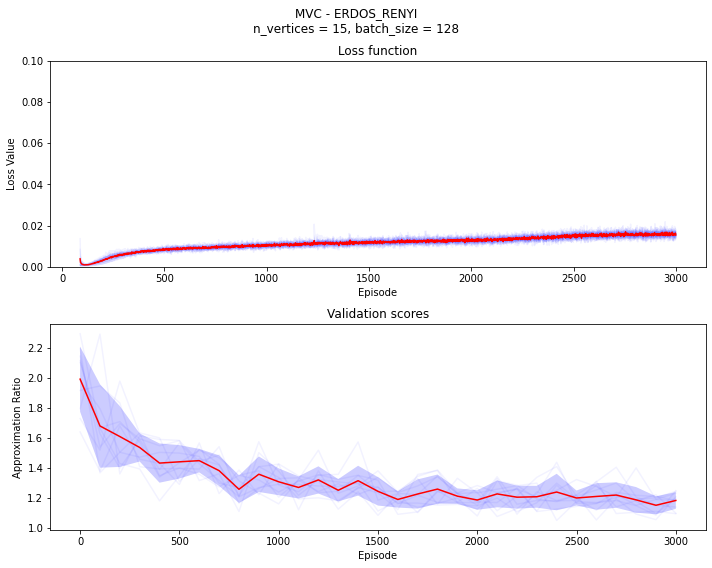

CPU times: user 4h 48s, sys: 2min 17s, total: 4h 3min 5s
Wall time: 38min 42s


In [15]:
%%time
params = {
    **mvc_base_params,
    'n_vertices': 15,
    'graph_type': GraphType.ERDOS_RENYI,
    'graph_params': {'p': 0.15},
}
experiment_idx = 5
agents = train(n_runs, params, PROBLEM, experiment_idx)
final_agents.append(final_agents)

{'problem': 'mvc', 'embedding_layers': 5, 'nstep': 1, 'lr_config': [[0, 0.001], [0.7, 0.0001]], 'eps_start': 1.0, 'eps_end': 0.01, 'eps_end_at_episode': 0.8, 'n_episodes': 3000, 'validate_each': 100, 'validate_at_start': True, 'print_train_metrics_each': 10, 'batch_size': 128, 'exact_solution_max_size': 20, 'discount_factor': 1.0, 'warmup_steps': 1000, 'update_params_each': 1, 'target_update': 'soft', 'double_dqn': True, 'tau': 0.005, 'n_vertices': 15, 'graph_type': <GraphType.ERDOS_RENYI: 2>, 'graph_params': {'p': 0.3}}
Starting run #1/10...


/home/tiago/anaconda3/lib/python3.8/site-packages/torch/nn/init.py:453: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


Starting run #2/10...
Starting run #3/10...
Starting run #4/10...
Starting run #5/10...
Starting run #6/10...
Starting run #7/10...
Starting run #8/10...
Starting run #9/10...
Starting run #10/10...
Min of avg validation score across episodes: 1.0619246031746032


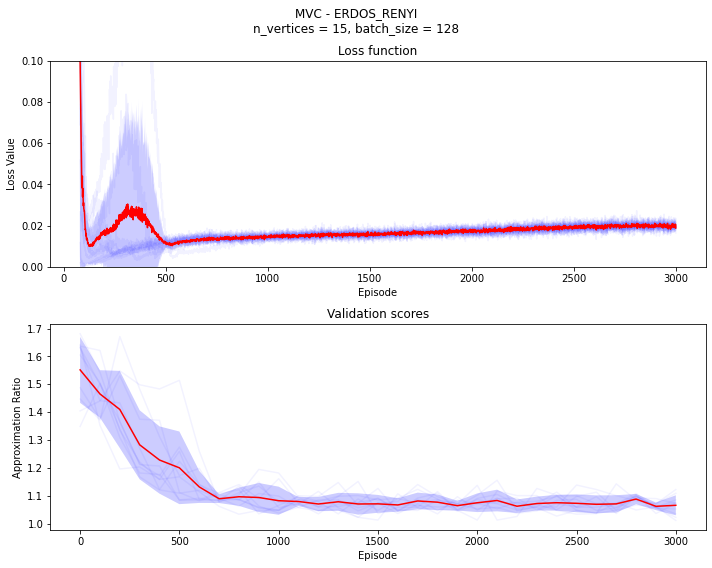

CPU times: user 4h 52min 58s, sys: 2min 31s, total: 4h 55min 29s
Wall time: 48min 25s


In [16]:
%%time
params = {
    **mvc_base_params,
    'n_vertices': 15,
    'graph_type': GraphType.ERDOS_RENYI,
    'graph_params': {'p': 0.30},
}
experiment_idx = 6
agents = train(n_runs, params, PROBLEM, experiment_idx)
final_agents.append(final_agents)

{'problem': 'mvc', 'embedding_layers': 5, 'nstep': 1, 'lr_config': [[0, 0.001], [0.7, 0.0001]], 'eps_start': 1.0, 'eps_end': 0.01, 'eps_end_at_episode': 0.8, 'n_episodes': 3000, 'validate_each': 100, 'validate_at_start': True, 'print_train_metrics_each': 10, 'batch_size': 128, 'exact_solution_max_size': 20, 'discount_factor': 1.0, 'warmup_steps': 1000, 'update_params_each': 1, 'target_update': 'soft', 'double_dqn': True, 'tau': 0.005, 'n_vertices': 20, 'graph_type': <GraphType.BARABASI_ALBERT: 3>, 'graph_params': {'m': 4}}
Starting run #1/10...


/home/tiago/anaconda3/lib/python3.8/site-packages/torch/nn/init.py:453: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


Starting run #2/10...
Starting run #3/10...
Starting run #4/10...
Starting run #5/10...
Starting run #6/10...
Starting run #7/10...
Starting run #8/10...
Starting run #9/10...
Starting run #10/10...
Min of avg validation score across episodes: 1.0143531468531468


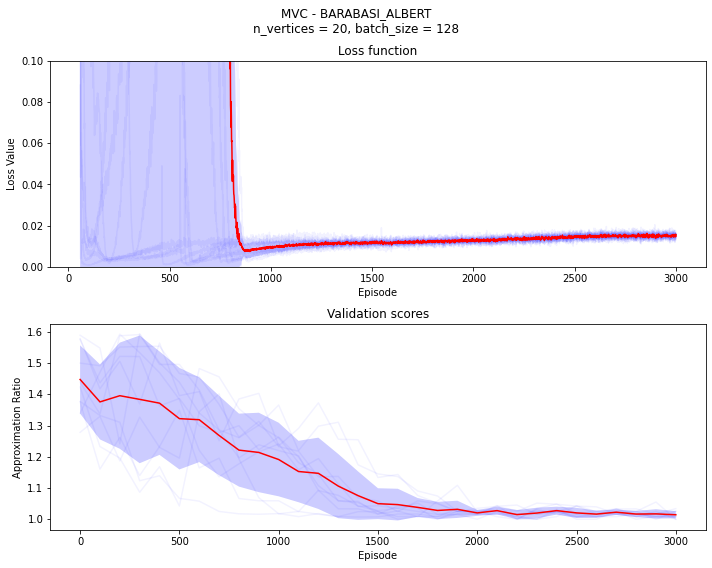

CPU times: user 7h 48min 17s, sys: 2min 42s, total: 7h 51min
Wall time: 1h 7min 20s


In [17]:
%%time
params = {
    **mvc_base_params,
    'n_vertices': 20,
    'graph_type': GraphType.BARABASI_ALBERT,
    'graph_params': {'m': 4},
}
experiment_idx = 7
agents = train(n_runs, params, PROBLEM, experiment_idx)
final_agents.append(final_agents)

{'problem': 'mvc', 'embedding_layers': 5, 'nstep': 1, 'lr_config': [[0, 0.001], [0.7, 0.0001]], 'eps_start': 1.0, 'eps_end': 0.01, 'eps_end_at_episode': 0.8, 'n_episodes': 3000, 'validate_each': 100, 'validate_at_start': True, 'print_train_metrics_each': 10, 'batch_size': 128, 'exact_solution_max_size': 20, 'discount_factor': 1.0, 'warmup_steps': 1000, 'update_params_each': 1, 'target_update': 'soft', 'double_dqn': True, 'tau': 0.005, 'n_vertices': 20, 'graph_type': <GraphType.ERDOS_RENYI: 2>, 'graph_params': {'p': 0.15}}
Starting run #1/10...


/home/tiago/anaconda3/lib/python3.8/site-packages/torch/nn/init.py:453: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


Starting run #2/10...
Starting run #3/10...
Starting run #4/10...
Starting run #5/10...
Starting run #6/10...
Starting run #7/10...
Starting run #8/10...
Starting run #9/10...
Starting run #10/10...
Min of avg validation score across episodes: 1.0902680375180374


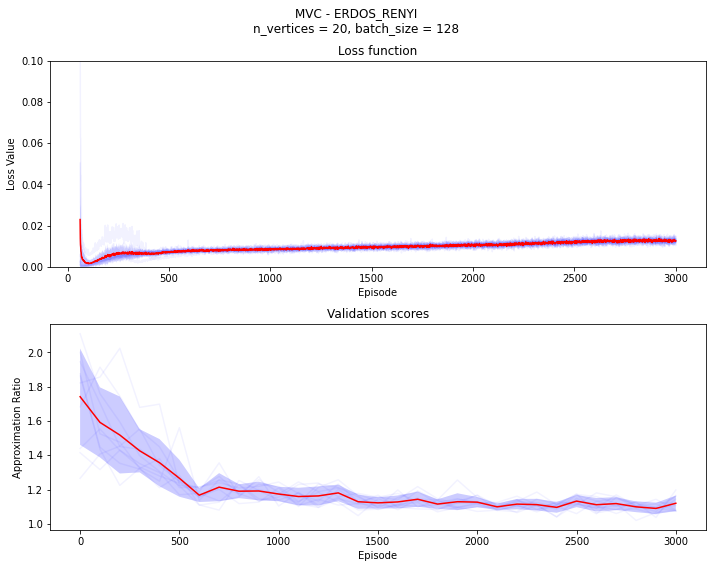

CPU times: user 5h 50min 45s, sys: 2min 15s, total: 5h 53min 1s
Wall time: 49min 22s


In [18]:
%%time
params = {
    **mvc_base_params,
    'n_vertices': 20,
    'graph_type': GraphType.ERDOS_RENYI,
    'graph_params': {'p': 0.15},
}
experiment_idx = 8
agents = train(n_runs, params, PROBLEM, experiment_idx)
final_agents.append(final_agents)

{'problem': 'mvc', 'embedding_layers': 5, 'nstep': 1, 'lr_config': [[0, 0.001], [0.7, 0.0001]], 'eps_start': 1.0, 'eps_end': 0.01, 'eps_end_at_episode': 0.8, 'n_episodes': 3000, 'validate_each': 100, 'validate_at_start': True, 'print_train_metrics_each': 10, 'batch_size': 128, 'exact_solution_max_size': 20, 'discount_factor': 1.0, 'warmup_steps': 1000, 'update_params_each': 1, 'target_update': 'soft', 'double_dqn': True, 'tau': 0.005, 'n_vertices': 20, 'graph_type': <GraphType.ERDOS_RENYI: 2>, 'graph_params': {'p': 0.3}}
Starting run #1/10...


/home/tiago/anaconda3/lib/python3.8/site-packages/torch/nn/init.py:453: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


Starting run #2/10...
Starting run #3/10...
Starting run #4/10...
Starting run #5/10...
Starting run #6/10...
Starting run #7/10...
Starting run #8/10...
Starting run #9/10...
Starting run #10/10...
Min of avg validation score across episodes: 1.0497479187479186


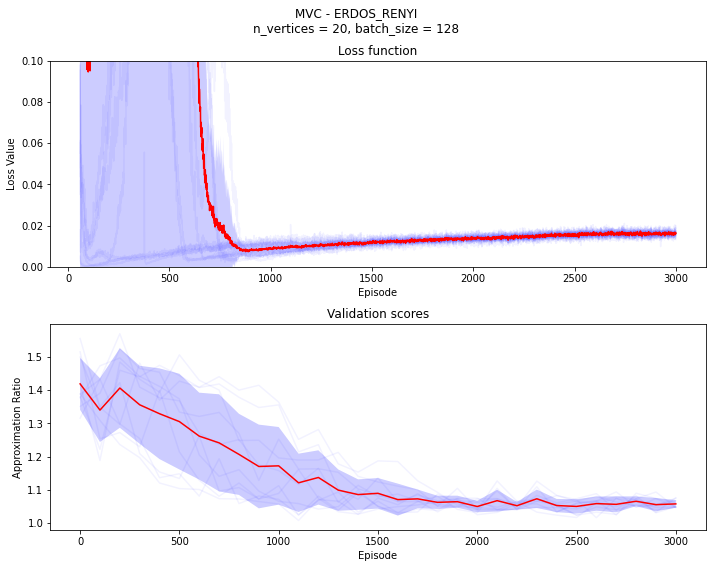

CPU times: user 6h 53min 43s, sys: 2min 22s, total: 6h 56min 6s
Wall time: 57min 45s


In [19]:
%%time
params = {
    **mvc_base_params,
    'n_vertices': 20,
    'graph_type': GraphType.ERDOS_RENYI,
    'graph_params': {'p': 0.30},
}
experiment_idx = 9
agents = train(n_runs, params, PROBLEM, experiment_idx)
final_agents.append(final_agents)

{'problem': 'mvc', 'embedding_layers': 5, 'nstep': 1, 'lr_config': [[0, 0.001], [0.7, 0.0001]], 'eps_start': 1.0, 'eps_end': 0.01, 'eps_end_at_episode': 0.8, 'n_episodes': 3000, 'validate_each': 100, 'validate_at_start': True, 'print_train_metrics_each': 10, 'batch_size': 128, 'exact_solution_max_size': 20, 'discount_factor': 1.0, 'warmup_steps': 1000, 'update_params_each': 1, 'target_update': 'soft', 'double_dqn': True, 'tau': 0.005, 'n_vertices': 25, 'graph_type': <GraphType.BARABASI_ALBERT: 3>, 'graph_params': {'m': 4}}
Starting run #1/10...


/home/tiago/anaconda3/lib/python3.8/site-packages/torch/nn/init.py:453: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


Starting run #2/10...
Starting run #3/10...
Starting run #4/10...
Starting run #5/10...
Starting run #6/10...
Starting run #7/10...
Starting run #8/10...
Starting run #9/10...
Starting run #10/10...
Min of avg validation score across episodes: 1.0855705128205126


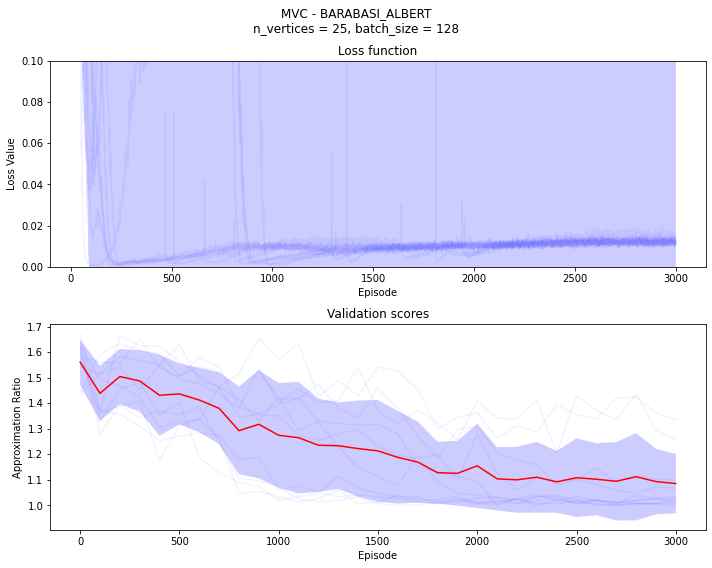

CPU times: user 9h 7min 58s, sys: 2min 32s, total: 9h 10min 31s
Wall time: 1h 15min 3s


In [20]:
%%time
params = {
    **mvc_base_params,
    'n_vertices': 25,
    'graph_type': GraphType.BARABASI_ALBERT,
    'graph_params': {'m': 4},
}
experiment_idx = 10
agents = train(n_runs, params, PROBLEM, experiment_idx)
final_agents.append(final_agents)

{'problem': 'mvc', 'embedding_layers': 5, 'nstep': 1, 'lr_config': [[0, 0.001], [0.7, 0.0001]], 'eps_start': 1.0, 'eps_end': 0.01, 'eps_end_at_episode': 0.8, 'n_episodes': 3000, 'validate_each': 100, 'validate_at_start': True, 'print_train_metrics_each': 10, 'batch_size': 128, 'exact_solution_max_size': 20, 'discount_factor': 1.0, 'warmup_steps': 1000, 'update_params_each': 1, 'target_update': 'soft', 'double_dqn': True, 'tau': 0.005, 'n_vertices': 25, 'graph_type': <GraphType.ERDOS_RENYI: 2>, 'graph_params': {'p': 0.15}}
Starting run #1/10...


/home/tiago/anaconda3/lib/python3.8/site-packages/torch/nn/init.py:453: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


Starting run #2/10...
Starting run #3/10...
Starting run #4/10...
Starting run #5/10...
Starting run #6/10...
Starting run #7/10...
Starting run #8/10...
Starting run #9/10...
Starting run #10/10...
Min of avg validation score across episodes: 1.077344655344655


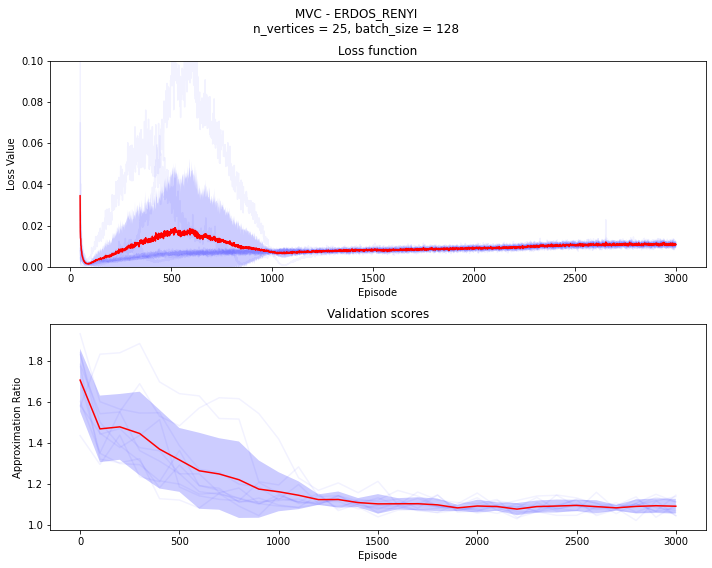

CPU times: user 8h 8min 19s, sys: 2min 44s, total: 8h 11min 4s
Wall time: 1h 7min 41s


In [21]:
%%time
params = {
    **mvc_base_params,
    'n_vertices': 25,
    'graph_type': GraphType.ERDOS_RENYI,
    'graph_params': {'p': 0.15},
}
experiment_idx = 11
agents = train(n_runs, params, PROBLEM, experiment_idx)
final_agents.append(final_agents)

{'problem': 'mvc', 'embedding_layers': 5, 'nstep': 1, 'lr_config': [[0, 0.001], [0.7, 0.0001]], 'eps_start': 1.0, 'eps_end': 0.01, 'eps_end_at_episode': 0.8, 'n_episodes': 3000, 'validate_each': 100, 'validate_at_start': True, 'print_train_metrics_each': 10, 'batch_size': 128, 'exact_solution_max_size': 20, 'discount_factor': 1.0, 'warmup_steps': 1000, 'update_params_each': 1, 'target_update': 'soft', 'double_dqn': True, 'tau': 0.005, 'n_vertices': 25, 'graph_type': <GraphType.ERDOS_RENYI: 2>, 'graph_params': {'p': 0.3}}
Starting run #1/10...


/home/tiago/anaconda3/lib/python3.8/site-packages/torch/nn/init.py:453: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


Starting run #2/10...
Starting run #3/10...
Starting run #4/10...
Starting run #5/10...
Starting run #6/10...
Starting run #7/10...
Starting run #8/10...
Starting run #9/10...
Starting run #10/10...
Min of avg validation score across episodes: 1.0423970588235292


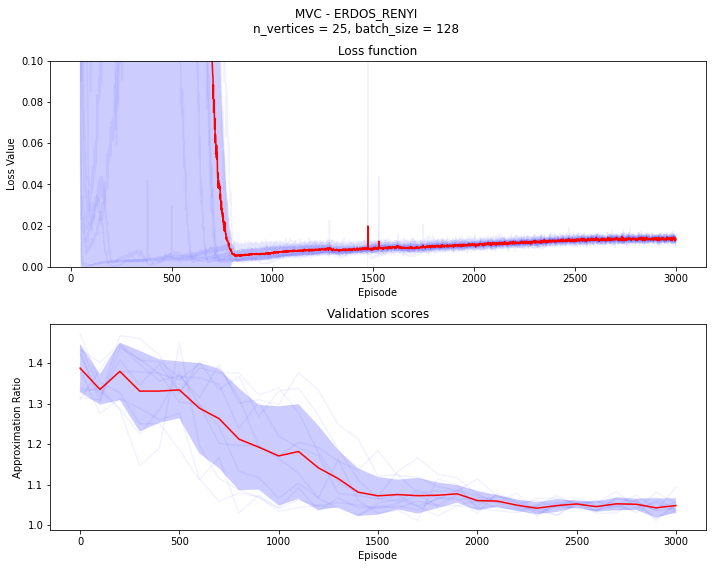

CPU times: user 9h 30min 54s, sys: 2min 46s, total: 9h 33min 41s
Wall time: 1h 18min 46s


In [22]:
%%time
params = {
    **mvc_base_params,
    'n_vertices': 25,
    'graph_type': GraphType.ERDOS_RENYI,
    'graph_params': {'p': 0.30},
}
experiment_idx = 12
agents = train(n_runs, params, PROBLEM, experiment_idx)
final_agents.append(final_agents)

In [23]:
1

1

In [ ]:
%%time
params = {
    **mvc_base_params,
    'n_vertices': 20,
    'graph_type': GraphType.ERDOS_RENYI,
    'graph_params': {'p': 0.30, 'connected': False},
}
experiment_idx = 13
agents = train(n_runs, params, PROBLEM, experiment_idx)
final_agents.append(final_agents)

{'problem': 'mvc', 'embedding_layers': 5, 'nstep': 1, 'lr_config': [[0, 0.001], [0.7, 0.0001]], 'eps_start': 1.0, 'eps_end': 0.01, 'eps_end_at_episode': 0.8, 'n_episodes': 3000, 'validate_each': 100, 'validate_at_start': True, 'print_train_metrics_each': 10, 'batch_size': 128, 'exact_solution_max_size': 20, 'discount_factor': 1.0, 'warmup_steps': 1000, 'update_params_each': 1, 'target_update': 'soft', 'double_dqn': True, 'tau': 0.005, 'n_vertices': 20, 'graph_type': <GraphType.ERDOS_RENYI: 2>, 'graph_params': {'p': 0.3, 'connected': True}}
Starting run #1/10...


/home/tiago/anaconda3/lib/python3.8/site-packages/torch/nn/init.py:453: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


Starting run #2/10...
Starting run #3/10...
Starting run #4/10...
Starting run #5/10...
Starting run #6/10...
Starting run #7/10...
Starting run #8/10...
Starting run #9/10...
Starting run #10/10...
Min of avg validation score across episodes: 1.0459265734265732


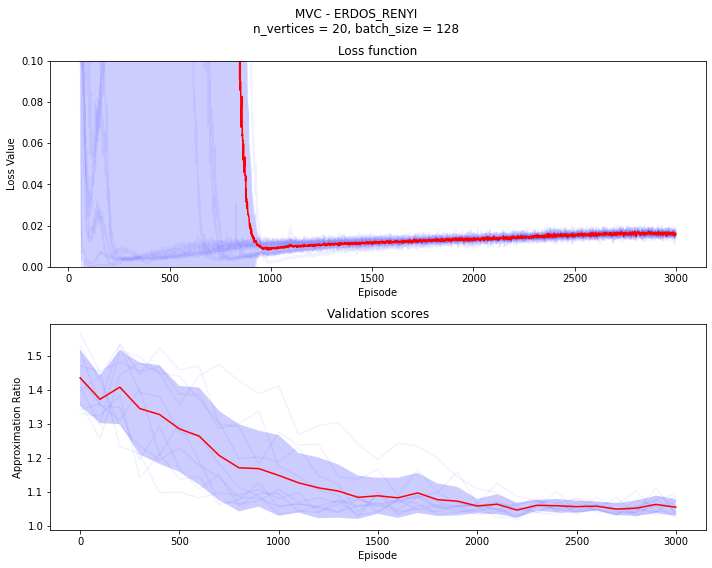

CPU times: user 9h 23min 40s, sys: 3min 55s, total: 9h 27min 36s
Wall time: 1h 30min 50s


In [25]:
%%time
params = {
    **mvc_base_params,
    'n_vertices': 20,
    'graph_type': GraphType.ERDOS_RENYI,
    'graph_params': {'p': 0.30, 'connected': True},
}
experiment_idx = 14
agents = train(n_runs, params, PROBLEM, experiment_idx)
final_agents.append(final_agents)

{'problem': 'mvc', 'embedding_layers': 5, 'nstep': 1, 'lr_config': [[0, 0.001], [0.7, 0.0001]], 'eps_start': 1.0, 'eps_end': 0.01, 'eps_end_at_episode': 0.9, 'n_episodes': 3000, 'validate_each': 100, 'validate_at_start': True, 'print_train_metrics_each': 10, 'batch_size': 128, 'exact_solution_max_size': 20, 'discount_factor': 1.0, 'warmup_steps': 1000, 'update_params_each': 1, 'target_update': 'soft', 'double_dqn': True, 'tau': 0.005, 'n_vertices': 40, 'graph_type': <GraphType.BARABASI_ALBERT: 3>, 'graph_params': {'m': 4}}
Starting run #1/10...


/home/tiago/anaconda3/lib/python3.8/site-packages/torch/nn/init.py:453: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


Starting run #2/10...
Starting run #3/10...
Starting run #4/10...
Starting run #5/10...
Starting run #6/10...
Starting run #7/10...
Starting run #8/10...
Starting run #9/10...
Starting run #10/10...
Min of avg validation score across episodes: 1.5108515289058766


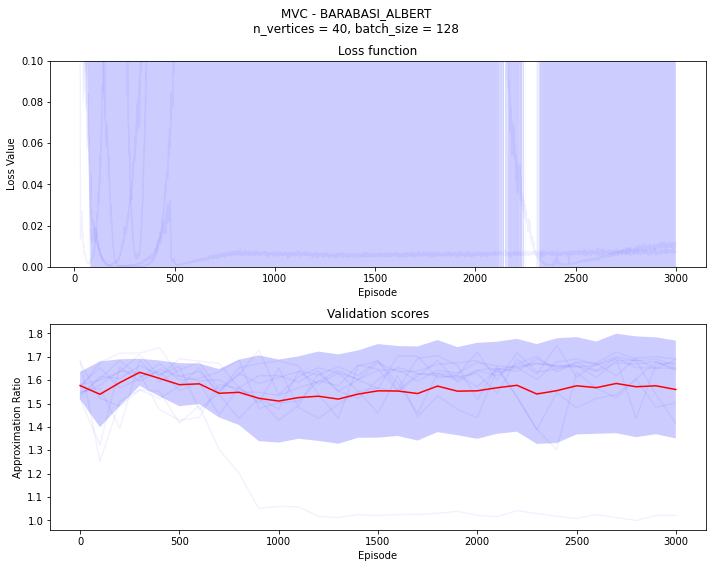

CPU times: user 20h 32min 39s, sys: 3min 26s, total: 20h 36min 5s
Wall time: 2h 46min 28s


In [6]:
%%time
params = {
    **mvc_base_params,
    'n_vertices': 40,
    'graph_type': GraphType.BARABASI_ALBERT,
    'graph_params': {'m': 4},
}
experiment_idx = 15
agents_15 = train(n_runs, params, PROBLEM, experiment_idx)

{'problem': 'mvc', 'embedding_layers': 5, 'nstep': 1, 'lr_config': [[0, 0.001], [0.7, 0.0001]], 'eps_start': 1.0, 'eps_end': 0.01, 'eps_end_at_episode': 0.9, 'n_episodes': 3000, 'validate_each': 100, 'validate_at_start': True, 'print_train_metrics_each': 10, 'batch_size': 128, 'exact_solution_max_size': 20, 'discount_factor': 1.0, 'warmup_steps': 1000, 'update_params_each': 1, 'target_update': 'soft', 'double_dqn': True, 'tau': 0.005, 'n_vertices': 40, 'graph_type': <GraphType.ERDOS_RENYI: 2>, 'graph_params': {'p': 0.15}}
Starting run #1/10...


/home/tiago/anaconda3/lib/python3.8/site-packages/torch/nn/init.py:453: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


Starting run #2/10...
Starting run #3/10...
Starting run #4/10...
Starting run #5/10...
Starting run #6/10...
Starting run #7/10...
Starting run #8/10...
Starting run #9/10...
Starting run #10/10...
Min of avg validation score across episodes: 1.1267671981802416


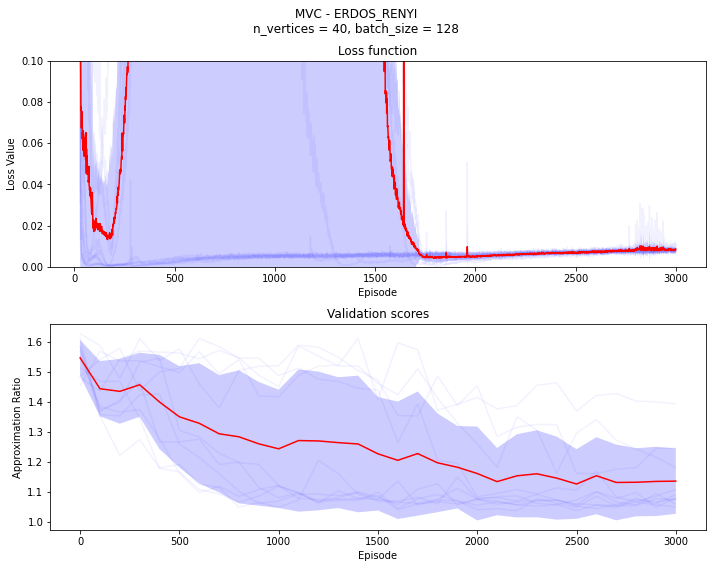

CPU times: user 19h 2min 12s, sys: 4min 35s, total: 19h 6min 48s
Wall time: 2h 41min 46s


In [7]:
%%time
params = {
    **mvc_base_params,
    'n_vertices': 40,
    'graph_type': GraphType.ERDOS_RENYI,
    'graph_params': {'p': 0.15},
}
experiment_idx = 16
agents_16 = train(n_runs, params, PROBLEM, experiment_idx)

{'problem': 'mvc', 'embedding_layers': 5, 'nstep': 1, 'lr_config': [[0, 0.001], [0.7, 0.0001]], 'eps_start': 1.0, 'eps_end': 0.01, 'eps_end_at_episode': 0.9, 'n_episodes': 3000, 'validate_each': 100, 'validate_at_start': True, 'print_train_metrics_each': 10, 'batch_size': 128, 'exact_solution_max_size': 20, 'discount_factor': 1.0, 'warmup_steps': 1000, 'update_params_each': 1, 'target_update': 'soft', 'double_dqn': True, 'tau': 0.005, 'n_vertices': 40, 'graph_type': <GraphType.ERDOS_RENYI: 2>, 'graph_params': {'p': 0.3}}
Starting run #1/10...


/home/tiago/anaconda3/lib/python3.8/site-packages/torch/nn/init.py:453: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


Starting run #2/10...
Starting run #3/10...
Starting run #4/10...
Starting run #5/10...
Starting run #6/10...
Starting run #7/10...
Starting run #8/10...
Starting run #9/10...
Starting run #10/10...
Min of avg validation score across episodes: 1.164959096600573


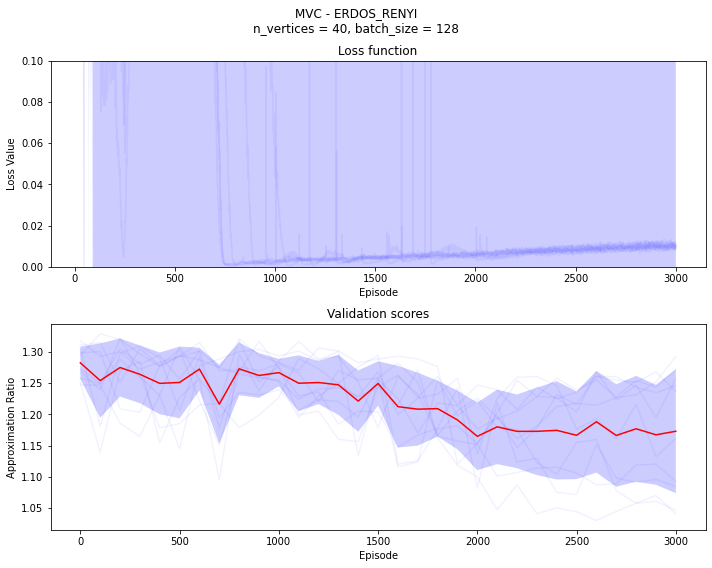

CPU times: user 21h 2min 50s, sys: 7min 3s, total: 21h 9min 53s
Wall time: 3h 4min 53s


In [9]:
%%time
params = {
    **mvc_base_params,
    'n_vertices': 40,
    'graph_type': GraphType.ERDOS_RENYI,
    'graph_params': {'p': 0.30},
}
experiment_idx = 17
agents_17 = train(n_runs, params, PROBLEM, experiment_idx)

{'problem': 'mvc', 'embedding_layers': 5, 'nstep': 1, 'lr_config': [[0, 0.0001]], 'eps_start': 1.0, 'eps_end': 0.01, 'eps_end_at_episode': 0.9, 'n_episodes': 3000, 'validate_each': 100, 'validate_at_start': True, 'print_train_metrics_each': 10, 'batch_size': 128, 'exact_solution_max_size': 20, 'discount_factor': 1.0, 'warmup_steps': 1000, 'update_params_each': 1, 'target_update': 'soft', 'double_dqn': True, 'tau': 0.005, 'n_vertices': 40, 'graph_type': <GraphType.ERDOS_RENYI: 2>, 'graph_params': {'p': 0.3}}
Starting run #1/10...


/home/tiago/anaconda3/lib/python3.8/site-packages/torch/nn/init.py:453: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


Starting run #2/10...
Starting run #3/10...
Starting run #4/10...
Starting run #5/10...
Starting run #6/10...
Starting run #7/10...
Starting run #8/10...
Starting run #9/10...
Starting run #10/10...
Min of avg validation score across episodes: 1.1759348453013634


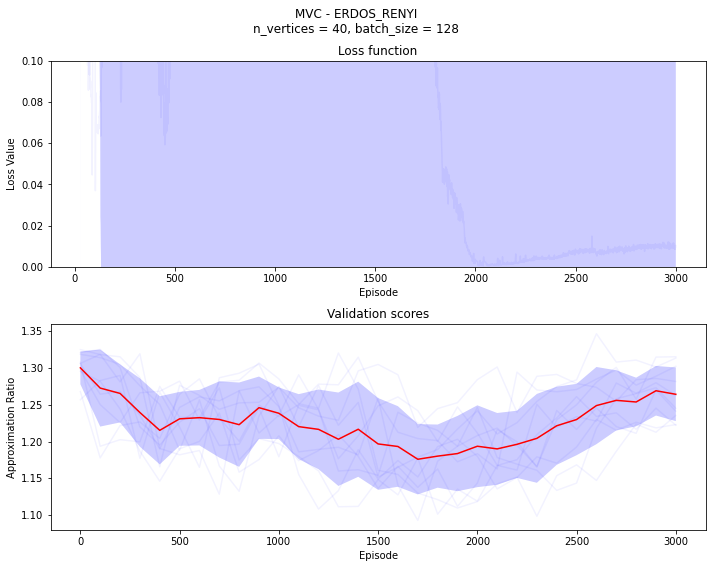

CPU times: user 21h 50min 23s, sys: 7min 52s, total: 21h 58min 15s
Wall time: 3h 14min 40s


In [10]:
%%time
params = {
    **mvc_base_params,
    'n_vertices': 40,
    'graph_type': GraphType.ERDOS_RENYI,
    'graph_params': {'p': 0.30},
    'lr_config': [[0, 1e-4]],
}
experiment_idx = 18
agents_18 = train(n_runs, params, PROBLEM, experiment_idx)

## =============== End of experiments ===============

{'problem': 'mvc', 'embedding_layers': 5, 'nstep': 1, 'lr_config': [[0, 0.001], [0.7, 0.0001]], 'eps_start': 1.0, 'eps_end': 0.01, 'eps_end_at_episode': 1.0, 'n_episodes': 2500, 'validate_each': 100, 'validate_at_start': True, 'print_train_metrics_each': 10, 'batch_size': 64, 'exact_solution_max_size': 20, 'discount_factor': 1.0, 'n_vertices': 10, 'graph_type': <GraphType.BARABASI_ALBERT: 3>, 'graph_params': {'m': 4}, 'warmup_steps': 0, 'update_params_each': 1}


/home/tiago/anaconda3/lib/python3.8/site-packages/torch/nn/init.py:453: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


Starting run #1/3...
self.global_t_step=313
self.global_t_step=563
self.global_t_step=813
self.global_t_step=1063
self.global_t_step=1313
self.global_t_step=1563
self.global_t_step=1813
self.global_t_step=2063
self.global_t_step=2313
self.global_t_step=2563
self.global_t_step=2813
self.global_t_step=3063
self.global_t_step=3313
self.global_t_step=3563
self.global_t_step=3813
self.global_t_step=4063
self.global_t_step=4313
self.global_t_step=4563
self.global_t_step=4813
self.global_t_step=5063
self.global_t_step=5313
self.global_t_step=5563
self.global_t_step=5813
self.global_t_step=6063
self.global_t_step=6313
self.global_t_step=6563
self.global_t_step=6813
self.global_t_step=7063
self.global_t_step=7313
self.global_t_step=7563
self.global_t_step=7813
self.global_t_step=8063
self.global_t_step=8313
self.global_t_step=8563
self.global_t_step=8813
self.global_t_step=9063
self.global_t_step=9313
self.global_t_step=9563
self.global_t_step=9813
self.global_t_step=10063
self.global_t_step=10

/home/tiago/anaconda3/lib/python3.8/site-packages/torch/nn/init.py:453: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


Starting run #2/3...
self.global_t_step=313
self.global_t_step=563
self.global_t_step=813
self.global_t_step=1063
self.global_t_step=1313
self.global_t_step=1563
self.global_t_step=1813
self.global_t_step=2063
self.global_t_step=2313
self.global_t_step=2563
self.global_t_step=2813
self.global_t_step=3063
self.global_t_step=3313
self.global_t_step=3563
self.global_t_step=3813
self.global_t_step=4063
self.global_t_step=4313
self.global_t_step=4563
self.global_t_step=4813
self.global_t_step=5063
self.global_t_step=5313
self.global_t_step=5563
self.global_t_step=5813
self.global_t_step=6063
self.global_t_step=6313
self.global_t_step=6563
self.global_t_step=6813
self.global_t_step=7063
self.global_t_step=7313
self.global_t_step=7563
self.global_t_step=7813
self.global_t_step=8063
self.global_t_step=8313
self.global_t_step=8563
self.global_t_step=8813
self.global_t_step=9063
self.global_t_step=9313
self.global_t_step=9563
self.global_t_step=9813
self.global_t_step=10063
self.global_t_step=10

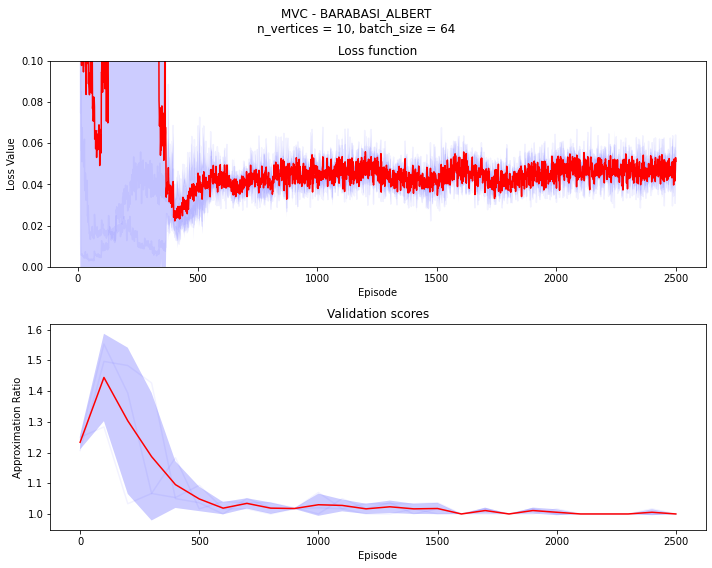

CPU times: user 44min 5s, sys: 32.1 s, total: 44min 37s
Wall time: 7min 32s


In [4]:
%%time
params = {
    **mvc_base_params,
    'n_vertices': 10,
    'graph_type': GraphType.BARABASI_ALBERT,
    'graph_params': {'m': 4},
    'warmup_steps': 0,
    'update_params_each': 1,
}
experiment_idx = -1
n_runs = 3
agents = train(n_runs, params, PROBLEM, experiment_idx)

{'problem': 'mvc', 'embedding_layers': 5, 'nstep': 1, 'lr_config': [[0, 0.001], [0.2, 0.0001], [0.9, 1e-05]], 'eps_start': 1.0, 'eps_end': 0.01, 'eps_end_at_episode': 1.0, 'n_episodes': 2500, 'validate_each': 100, 'validate_at_start': True, 'print_train_metrics_each': 10, 'batch_size': 64, 'exact_solution_max_size': 20, 'discount_factor': 1.0, 'n_vertices': 10, 'graph_type': <GraphType.ERDOS_RENYI: 2>, 'graph_params': {'p': 0.15}, 'warmup_steps': 0, 'update_params_each': 1, 'target_update': 'soft'}
Starting run #1/1...


/home/tiago/anaconda3/lib/python3.8/site-packages/torch/nn/init.py:453: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


Min of avg validation score across episodes: 1.195


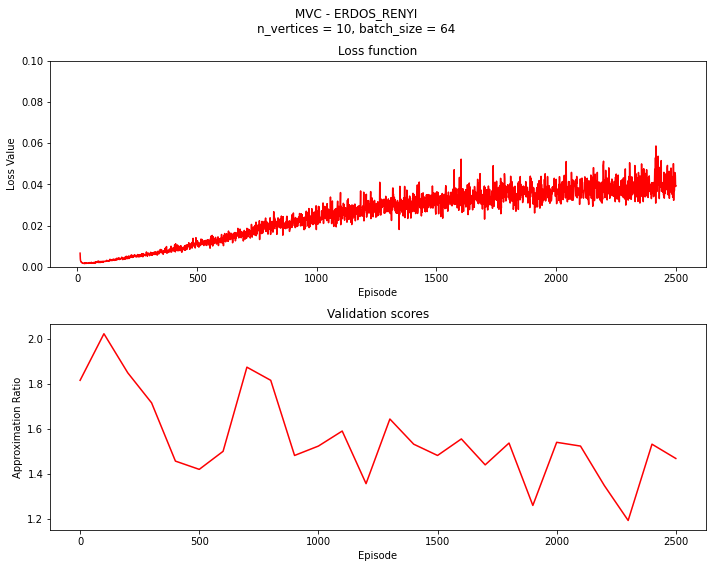

CPU times: user 9min 56s, sys: 7.14 s, total: 10min 3s
Wall time: 1min 30s


In [9]:
%%time
params = {
    **mvc_base_params,
    'n_vertices': 10,
    'graph_type': GraphType.ERDOS_RENYI,
    'graph_params': {'p': 0.15},
    'warmup_steps': 0,
    'update_params_each': 1,
    'lr_config': [[0, 1e-3], [0.2, 1e-4], [0.9, 1e-5]],
    'target_update': 'soft'
}
experiment_idx = -1
n_runs = 1
agents = train(n_runs, params, PROBLEM, experiment_idx)

{'problem': 'mvc', 'embedding_layers': 5, 'nstep': 1, 'lr_config': [[0, 0.001], [0.2, 0.0001], [0.9, 1e-05]], 'eps_start': 1.0, 'eps_end': 0.01, 'eps_end_at_episode': 1.0, 'n_episodes': 5000, 'validate_each': 100, 'validate_at_start': True, 'print_train_metrics_each': 10, 'batch_size': 64, 'exact_solution_max_size': 20, 'discount_factor': 1.0, 'n_vertices': 10, 'graph_type': <GraphType.ERDOS_RENYI: 2>, 'graph_params': {'p': 0.3}, 'warmup_steps': 0, 'update_params_each': 1, 'target_update': 'soft'}
Starting run #1/1...


/home/tiago/anaconda3/lib/python3.8/site-packages/torch/nn/init.py:453: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


Min of avg validation score across episodes: 1.02


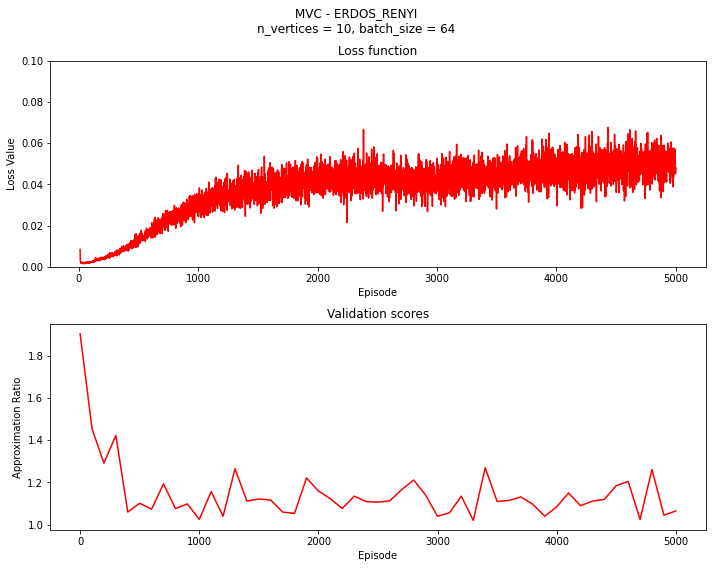

CPU times: user 22min 51s, sys: 13.3 s, total: 23min 4s
Wall time: 3min 25s


In [16]:
%%time
params = {
    **mvc_base_params,
    'n_vertices': 10,
    'graph_type': GraphType.ERDOS_RENYI,
    'graph_params': {'p': 0.3},
    'warmup_steps': 0,
    'update_params_each': 1,
    'lr_config': [[0, 1e-3], [0.2, 1e-4], [0.9, 1e-5]],
    'target_update': 'soft',
    'n_episodes': 5000,
}
experiment_idx = -1
n_runs = 1
agents = train(n_runs, params, PROBLEM, experiment_idx)

{'problem': 'mvc', 'embedding_layers': 5, 'nstep': 1, 'lr_config': [[0, 0.001], [0.2, 0.0001], [0.9, 1e-05]], 'eps_start': 1.0, 'eps_end': 0.01, 'eps_end_at_episode': 1.0, 'n_episodes': 5000, 'validate_each': 100, 'validate_at_start': True, 'print_train_metrics_each': 10, 'batch_size': 64, 'exact_solution_max_size': 20, 'discount_factor': 1.0, 'n_vertices': 10, 'graph_type': <GraphType.ERDOS_RENYI: 2>, 'graph_params': {'p': 0.3}, 'warmup_steps': 0, 'update_params_each': 1, 'target_update': 'soft', 'double_dqn': True}


/home/tiago/anaconda3/lib/python3.8/site-packages/torch/nn/init.py:453: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


Starting run #1/1...
Min of avg validation score across episodes: 1.0


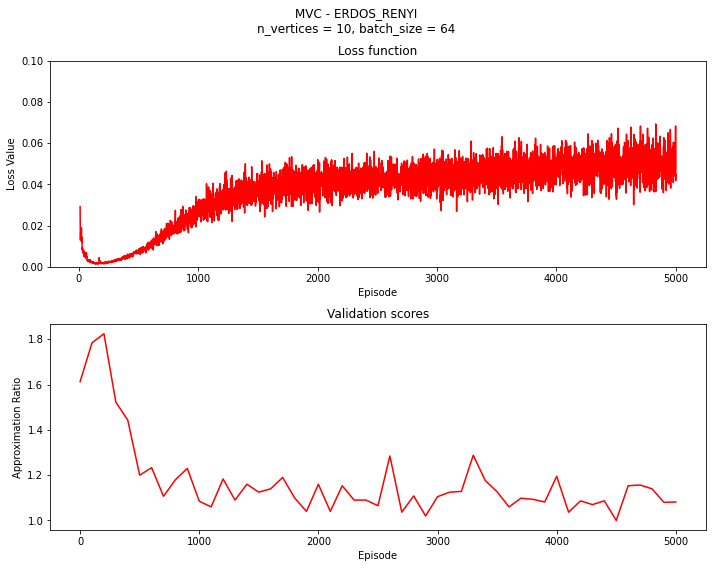

CPU times: user 25min, sys: 14.3 s, total: 25min 14s
Wall time: 3min 44s


In [4]:
%%time
params = {
    **mvc_base_params,
    'n_vertices': 10,
    'graph_type': GraphType.ERDOS_RENYI,
    'graph_params': {'p': 0.3},
    'warmup_steps': 0,
    'update_params_each': 1,
    'lr_config': [[0, 1e-3], [0.2, 1e-4], [0.9, 1e-5]],
    'target_update': 'soft',
    'n_episodes': 5000,
    'double_dqn': True,
}
experiment_idx = -1
n_runs = 1
agents = train(n_runs, params, PROBLEM, experiment_idx)

{'problem': 'mvc', 'embedding_layers': 5, 'nstep': 1, 'lr_config': [[0, 0.001], [0.05, 0.0001], [0.9, 1e-05]], 'eps_start': 1.0, 'eps_end': 0.01, 'eps_end_at_episode': 1.0, 'n_episodes': 5000, 'validate_each': 100, 'validate_at_start': True, 'print_train_metrics_each': 10, 'batch_size': 64, 'exact_solution_max_size': 20, 'discount_factor': 1.0, 'n_vertices': 10, 'graph_type': <GraphType.ERDOS_RENYI: 2>, 'graph_params': {'p': 0.3}, 'warmup_steps': 0, 'update_params_each': 1, 'target_update': 'soft', 'double_dqn': True}
Starting run #1/1...


/home/tiago/anaconda3/lib/python3.8/site-packages/torch/nn/init.py:453: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


Min of avg validation score across episodes: 1.02


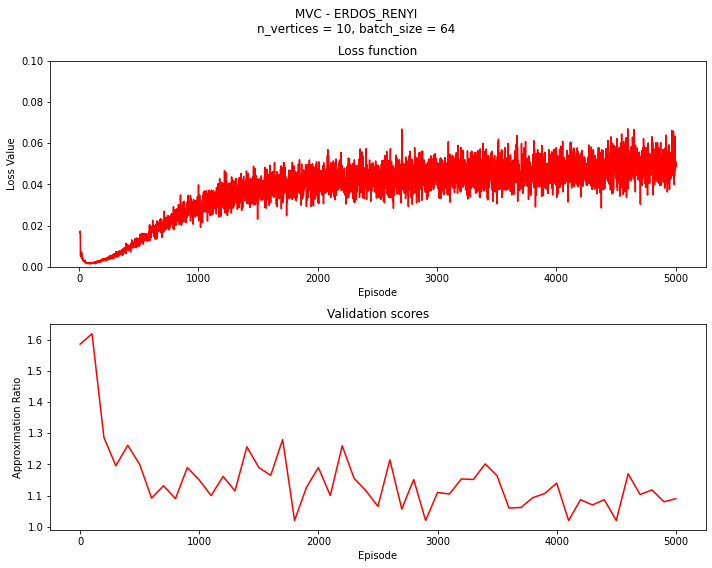

CPU times: user 25min 43s, sys: 14.3 s, total: 25min 57s
Wall time: 3min 50s


In [5]:
%%time
params = {
    **mvc_base_params,
    'n_vertices': 10,
    'graph_type': GraphType.ERDOS_RENYI,
    'graph_params': {'p': 0.3},
    'warmup_steps': 0,
    'update_params_each': 1,
    'lr_config': [[0, 1e-3], [0.05, 1e-4], [0.9, 1e-5]],
    'target_update': 'soft',
    'n_episodes': 5000,
    'double_dqn': True,
}
experiment_idx = -1
n_runs = 1
agents = train(n_runs, params, PROBLEM, experiment_idx)

{'problem': 'mvc', 'embedding_layers': 5, 'nstep': 1, 'lr_config': [[0, 0.001], [0.05, 0.0001], [0.9, 1e-05]], 'eps_start': 1.0, 'eps_end': 0.01, 'eps_end_at_episode': 1.0, 'n_episodes': 5000, 'validate_each': 100, 'validate_at_start': True, 'print_train_metrics_each': 10, 'batch_size': 64, 'exact_solution_max_size': 20, 'discount_factor': 0.9, 'n_vertices': 10, 'graph_type': <GraphType.ERDOS_RENYI: 2>, 'graph_params': {'p': 0.3}, 'warmup_steps': 0, 'update_params_each': 1, 'target_update': 'soft', 'double_dqn': True}
Starting run #1/1...


/home/tiago/anaconda3/lib/python3.8/site-packages/torch/nn/init.py:453: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


Min of avg validation score across episodes: 1.0


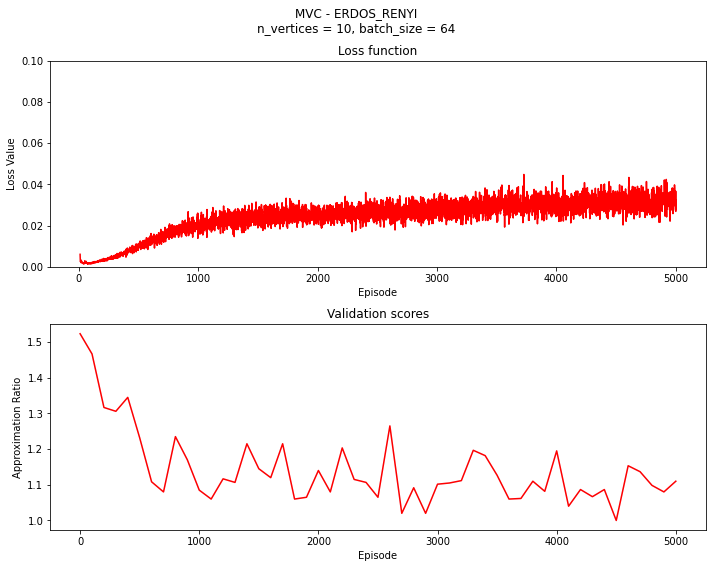

CPU times: user 25min 30s, sys: 14.3 s, total: 25min 44s
Wall time: 3min 46s


In [7]:
%%time
params = {
    **mvc_base_params,
    'n_vertices': 10,
    'graph_type': GraphType.ERDOS_RENYI,
    'graph_params': {'p': 0.3},
    'warmup_steps': 0,
    'update_params_each': 1,
    'lr_config': [[0, 1e-3], [0.05, 1e-4], [0.9, 1e-5]],
    'target_update': 'soft',
    'n_episodes': 5000,
    'double_dqn': True,
    'discount_factor': 0.9
}
experiment_idx = -1
n_runs = 1
agents = train(n_runs, params, PROBLEM, experiment_idx)

{'problem': 'mvc', 'embedding_layers': 5, 'nstep': 1, 'lr_config': [[0, 0.001], [0.05, 0.0001], [0.9, 1e-05]], 'eps_start': 1.0, 'eps_end': 0.01, 'eps_end_at_episode': 0.8, 'n_episodes': 5000, 'validate_each': 100, 'validate_at_start': True, 'print_train_metrics_each': 10, 'batch_size': 64, 'exact_solution_max_size': 20, 'discount_factor': 0.9, 'n_vertices': 10, 'graph_type': <GraphType.ERDOS_RENYI: 2>, 'graph_params': {'p': 0.3}, 'warmup_steps': 0, 'update_params_each': 1, 'target_update': 'soft', 'double_dqn': True}
Starting run #1/1...


/home/tiago/anaconda3/lib/python3.8/site-packages/torch/nn/init.py:453: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


Min of avg validation score across episodes: 1.02


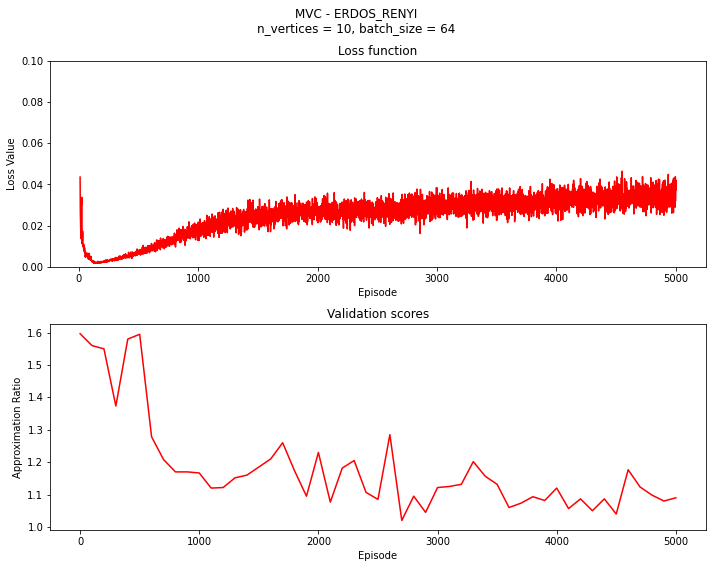

CPU times: user 24min 47s, sys: 14.5 s, total: 25min 2s
Wall time: 3min 40s


In [17]:
%%time
params = {
    **mvc_base_params,
    'n_vertices': 10,
    'graph_type': GraphType.ERDOS_RENYI,
    'graph_params': {'p': 0.3},
    'eps_start': 1.00,
    'eps_end': 0.01,
    'eps_end_at_episode': 0.8,
    'warmup_steps': 0,
    'update_params_each': 1,
    'lr_config': [[0, 1e-3], [0.05, 1e-4], [0.9, 1e-5]],
    'target_update': 'soft',
    'n_episodes': 5000,
    'double_dqn': True,
    'discount_factor': 1.0
}
experiment_idx = -1
n_runs = 1
agents = train(n_runs, params, PROBLEM, experiment_idx)

{'problem': 'mvc', 'embedding_layers': 5, 'nstep': 1, 'lr_config': [[0, 0.001], [0.05, 0.0001], [0.9, 1e-05]], 'eps_start': 1.0, 'eps_end': 0.01, 'eps_end_at_episode': 0.8, 'n_episodes': 2000, 'validate_each': 100, 'validate_at_start': True, 'print_train_metrics_each': 10, 'batch_size': 64, 'exact_solution_max_size': 20, 'discount_factor': 0.9, 'n_vertices': 10, 'graph_type': <GraphType.ERDOS_RENYI: 2>, 'graph_params': {'p': 0.3}, 'warmup_steps': 0, 'update_params_each': 1, 'target_update': 'soft', 'double_dqn': True}
Starting run #1/2...


/home/tiago/anaconda3/lib/python3.8/site-packages/torch/nn/init.py:453: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


Starting run #2/2...
Min of avg validation score across episodes: 1.0958333333333332


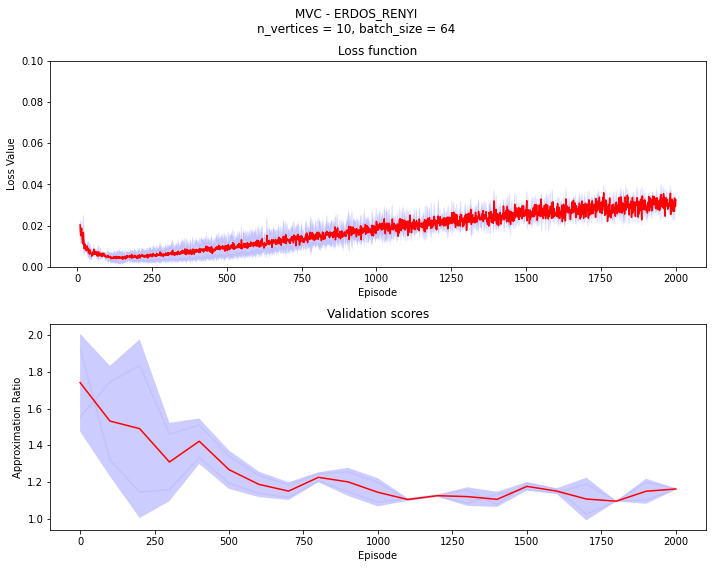

CPU times: user 20min 37s, sys: 13.3 s, total: 20min 50s
Wall time: 3min 8s


In [19]:
%%time
params = {
    **mvc_base_params,
    'n_vertices': 10,
    'graph_type': GraphType.ERDOS_RENYI,
    'graph_params': {'p': 0.3},
    'eps_start': 1.00,
    'eps_end': 0.01,
    'eps_end_at_episode': 0.8,
    'warmup_steps': 0,
    'update_params_each': 1,
    'lr_config': [[0, 1e-3], [0.05, 1e-4], [0.9, 1e-5]],
    'target_update': 'soft',
    'n_episodes': 2000,
    'double_dqn': True,
    'discount_factor': 0.9
}
experiment_idx = -1
n_runs = 2
agents = train(n_runs, params, PROBLEM, experiment_idx)

tau 0.005
{'problem': 'mvc', 'embedding_layers': 5, 'nstep': 1, 'lr_config': [[0, 0.001], [0.05, 0.0001], [0.9, 1e-05]], 'eps_start': 1.0, 'eps_end': 0.01, 'eps_end_at_episode': 0.8, 'n_episodes': 2000, 'validate_each': 100, 'validate_at_start': True, 'print_train_metrics_each': 10, 'batch_size': 64, 'exact_solution_max_size': 20, 'discount_factor': 1.0, 'n_vertices': 10, 'graph_type': <GraphType.ERDOS_RENYI: 2>, 'graph_params': {'p': 0.3}, 'warmup_steps': 0, 'update_params_each': 1, 'target_update': 'soft', 'double_dqn': True, 'tau': 0.005}
Starting run #1/2...


/home/tiago/anaconda3/lib/python3.8/site-packages/torch/nn/init.py:453: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


Starting run #2/2...
Min of avg validation score across episodes: 1.075


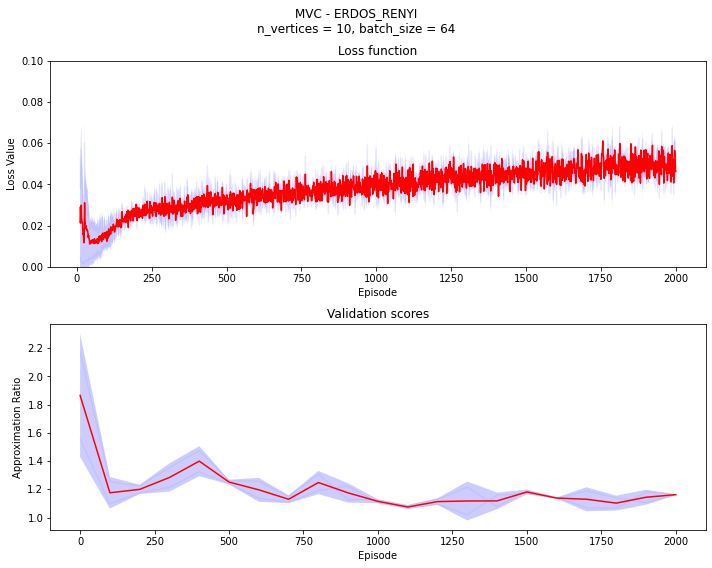

CPU times: user 20min 15s, sys: 12.5 s, total: 20min 27s
Wall time: 3min 2s


In [20]:
%%time
params = {
    **mvc_base_params,
    'n_vertices': 10,
    'graph_type': GraphType.ERDOS_RENYI,
    'graph_params': {'p': 0.3},
    'eps_start': 1.00,
    'eps_end': 0.01,
    'eps_end_at_episode': 0.8,
    'warmup_steps': 0,
    'update_params_each': 1,
    'lr_config': [[0, 1e-3], [0.05, 1e-4], [0.9, 1e-5]],
    'target_update': 'soft',
    'n_episodes': 2000,
    'double_dqn': True,
    'discount_factor': 1.0,
    'tau': 5e-3
}
experiment_idx = -1
n_runs = 2
agents = train(n_runs, params, PROBLEM, experiment_idx)

In [6]:
agents[0].optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 1e-05
    maximize: False
    weight_decay: 0
)

tau 0.005
{'problem': 'mvc', 'embedding_layers': 5, 'nstep': 1, 'lr_config': [[0, 0.001], [0.05, 0.0001], [0.9, 1e-05]], 'eps_start': 1.0, 'eps_end': 0.01, 'eps_end_at_episode': 0.8, 'n_episodes': 2000, 'validate_each': 100, 'validate_at_start': True, 'print_train_metrics_each': 10, 'batch_size': 64, 'exact_solution_max_size': 20, 'discount_factor': 1.0, 'n_vertices': 10, 'graph_type': <GraphType.ERDOS_RENYI: 2>, 'graph_params': {'p': 0.3}, 'warmup_steps': 0, 'update_params_each': 1, 'target_update': 'soft', 'double_dqn': True, 'tau': 0.005}
double_dqn=True


/home/tiago/anaconda3/lib/python3.8/site-packages/torch/nn/init.py:453: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


Starting run #1/2...
double_dqn=True
Starting run #2/2...


/home/tiago/anaconda3/lib/python3.8/site-packages/torch/nn/init.py:453: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


Min of avg validation score across episodes: 1.0975


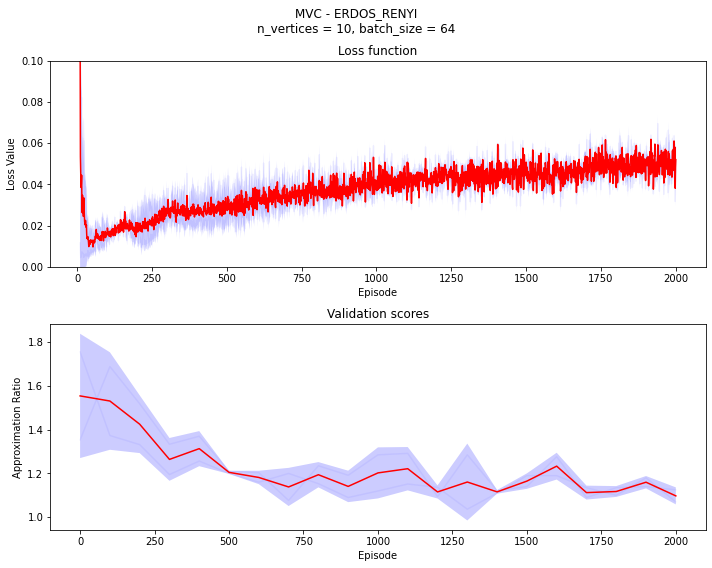

CPU times: user 19min 23s, sys: 12 s, total: 19min 35s
Wall time: 2min 52s


In [4]:
%%time
params = {
    **mvc_base_params,
    'n_vertices': 10,
    'graph_type': GraphType.ERDOS_RENYI,
    'graph_params': {'p': 0.3},
    'eps_start': 1.00,
    'eps_end': 0.01,
    'eps_end_at_episode': 0.8,
    'warmup_steps': 0,
    'update_params_each': 1,
    'lr_config': [[0, 1e-3], [0.05, 1e-4], [0.9, 1e-5]],
    'target_update': 'soft',
    'n_episodes': 2000,
    'double_dqn': True,
    'discount_factor': 1.0,
    'tau': 5e-3
}
experiment_idx = -1
n_runs = 2
agents = train(n_runs, params, PROBLEM, experiment_idx)

tau 0.005
{'problem': 'mvc', 'embedding_layers': 5, 'nstep': 1, 'lr_config': [[0, 0.001], [0.05, 0.0001], [0.9, 1e-05]], 'eps_start': 1.0, 'eps_end': 0.01, 'eps_end_at_episode': 0.8, 'n_episodes': 3000, 'validate_each': 100, 'validate_at_start': True, 'print_train_metrics_each': 10, 'batch_size': 64, 'exact_solution_max_size': 20, 'discount_factor': 1.0, 'n_vertices': 10, 'graph_type': <GraphType.ERDOS_RENYI: 2>, 'graph_params': {'p': 0.3}, 'warmup_steps': 1000, 'update_params_each': 1, 'target_update': 'soft', 'double_dqn': True, 'tau': 0.005}
double_dqn=True
Starting run #1/2...


/home/tiago/anaconda3/lib/python3.8/site-packages/torch/nn/init.py:453: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


double_dqn=True
Starting run #2/2...
Min of avg validation score across episodes: 1.0725000000000002


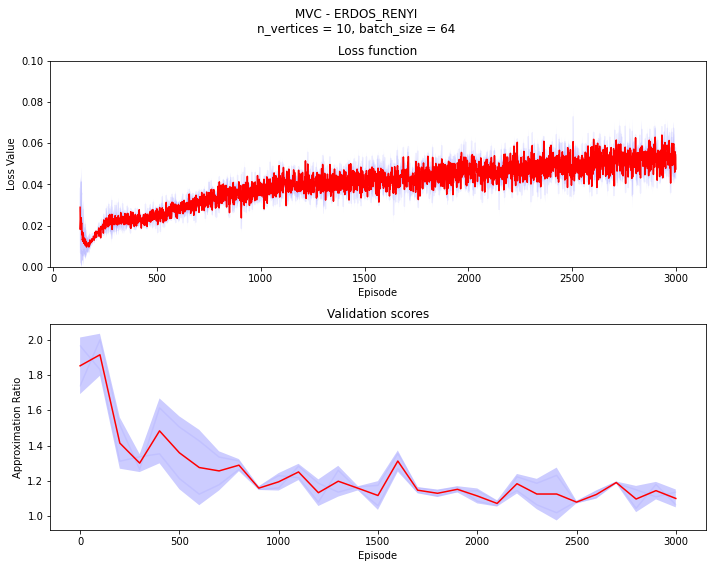

CPU times: user 28min 59s, sys: 17.7 s, total: 29min 17s
Wall time: 4min 21s


In [29]:
%%time
params = {
    **mvc_base_params,
    'n_vertices': 10,
    'graph_type': GraphType.ERDOS_RENYI,
    'graph_params': {'p': 0.3},
    'eps_start': 1.00,
    'eps_end': 0.01,
    'eps_end_at_episode': 0.8,
    'warmup_steps': 1000,
    'update_params_each': 1,
    'lr_config': [[0, 1e-3], [0.05, 1e-4], [0.9, 1e-5]],
    'target_update': 'soft',
    'n_episodes': 3000,
    'double_dqn': True,
    'discount_factor': 1.0,
    'tau': 5e-3
}
experiment_idx = -1
n_runs = 2
agents = train(n_runs, params, PROBLEM, experiment_idx)

tau 0.005
{'problem': 'mvc', 'embedding_layers': 5, 'nstep': 1, 'lr_config': [[0, 0.001], [0.05, 0.0001], [0.9, 1e-05]], 'eps_start': 1.0, 'eps_end': 0.01, 'eps_end_at_episode': 0.8, 'n_episodes': 3000, 'validate_each': 100, 'validate_at_start': True, 'print_train_metrics_each': 10, 'batch_size': 128, 'exact_solution_max_size': 20, 'discount_factor': 1.0, 'n_vertices': 10, 'graph_type': <GraphType.ERDOS_RENYI: 2>, 'graph_params': {'p': 0.3}, 'warmup_steps': 1000, 'update_params_each': 1, 'target_update': 'soft', 'double_dqn': True, 'tau': 0.005}
double_dqn=True
Starting run #1/2...


/home/tiago/anaconda3/lib/python3.8/site-packages/torch/nn/init.py:453: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


double_dqn=True
Starting run #2/2...
Min of avg validation score across episodes: 1.0608333333333333


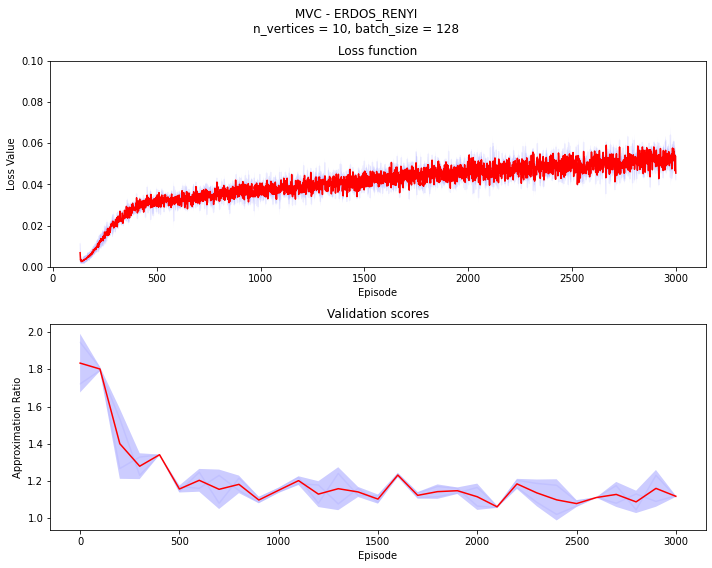

CPU times: user 30min 29s, sys: 18.2 s, total: 30min 48s
Wall time: 4min 43s


In [31]:
%%time
params = {
    **mvc_base_params,
    'n_vertices': 10,
    'graph_type': GraphType.ERDOS_RENYI,
    'graph_params': {'p': 0.3},
    'eps_start': 1.00,
    'eps_end': 0.01,
    'eps_end_at_episode': 0.8,
    'warmup_steps': 1000,
    'update_params_each': 1,
    'lr_config': [[0, 1e-3], [0.05, 1e-4], [0.9, 1e-5]],
    'target_update': 'soft',
    'n_episodes': 3000,
    'double_dqn': True,
    'discount_factor': 1.0,
    'tau': 5e-3,
    'batch_size': 128,
}
experiment_idx = -1
n_runs = 2
agents = train(n_runs, params, PROBLEM, experiment_idx)

tau 0.005
update_target_each 500
{'problem': 'mvc', 'embedding_layers': 5, 'nstep': 1, 'lr_config': [[0, 0.001], [0.05, 0.0001], [0.9, 1e-05]], 'eps_start': 1.0, 'eps_end': 0.01, 'eps_end_at_episode': 0.8, 'n_episodes': 3000, 'validate_each': 100, 'validate_at_start': True, 'print_train_metrics_each': 10, 'batch_size': 128, 'exact_solution_max_size': 20, 'discount_factor': 1.0, 'n_vertices': 10, 'graph_type': <GraphType.ERDOS_RENYI: 2>, 'graph_params': {'p': 0.3}, 'warmup_steps': 1000, 'update_params_each': 1, 'target_update': 'hard', 'double_dqn': True, 'tau': 0.005, 'update_target_each': 500}
double_dqn=True
Starting run #1/2...


/home/tiago/anaconda3/lib/python3.8/site-packages/torch/nn/init.py:453: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


double_dqn=True
Starting run #2/2...
Min of avg validation score across episodes: 1.0875


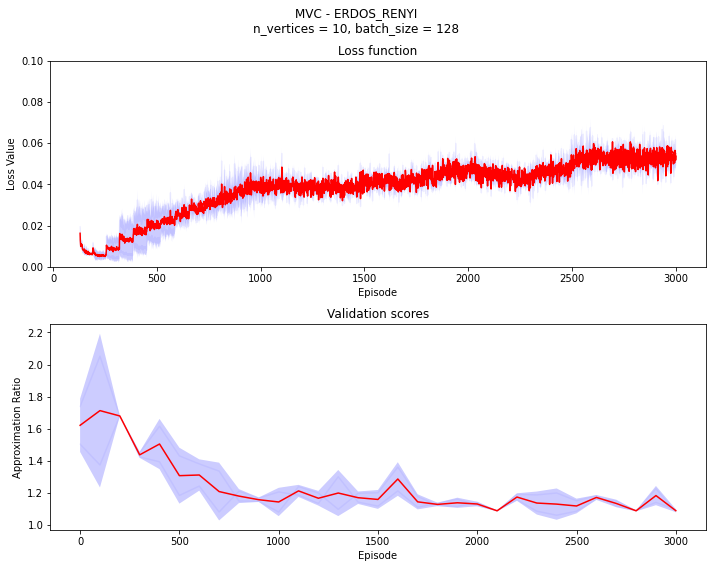

CPU times: user 30min 49s, sys: 18.9 s, total: 31min 8s
Wall time: 4min 47s


In [34]:
%%time
params = {
    **mvc_base_params,
    'n_vertices': 10,
    'graph_type': GraphType.ERDOS_RENYI,
    'graph_params': {'p': 0.3},
    'eps_start': 1.00,
    'eps_end': 0.01,
    'eps_end_at_episode': 0.8,
    'warmup_steps': 1000,
    'update_params_each': 1,
    'lr_config': [[0, 1e-3], [0.05, 1e-4], [0.9, 1e-5]],
    'target_update': 'hard',
    'n_episodes': 3000,
    'double_dqn': True,
    'discount_factor': 1.0,
    'tau': 5e-3,
    'batch_size': 128,
    'update_target_each': 500
}
experiment_idx = -1
n_runs = 2
agents = train(n_runs, params, PROBLEM, experiment_idx)

tau 0.005
update_target_each 2000
{'problem': 'mvc', 'embedding_layers': 5, 'nstep': 1, 'lr_config': [[0, 0.001], [0.05, 0.0001], [0.9, 1e-05]], 'eps_start': 1.0, 'eps_end': 0.01, 'eps_end_at_episode': 0.8, 'n_episodes': 3000, 'validate_each': 100, 'validate_at_start': True, 'print_train_metrics_each': 10, 'batch_size': 128, 'exact_solution_max_size': 20, 'discount_factor': 1.0, 'n_vertices': 10, 'graph_type': <GraphType.ERDOS_RENYI: 2>, 'graph_params': {'p': 0.3}, 'warmup_steps': 1000, 'update_params_each': 1, 'target_update': 'hard', 'double_dqn': True, 'tau': 0.005, 'update_target_each': 2000}
double_dqn=True
Starting run #1/2...


/home/tiago/anaconda3/lib/python3.8/site-packages/torch/nn/init.py:453: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


double_dqn=True
Starting run #2/2...
Min of avg validation score across episodes: 1.0750000000000002


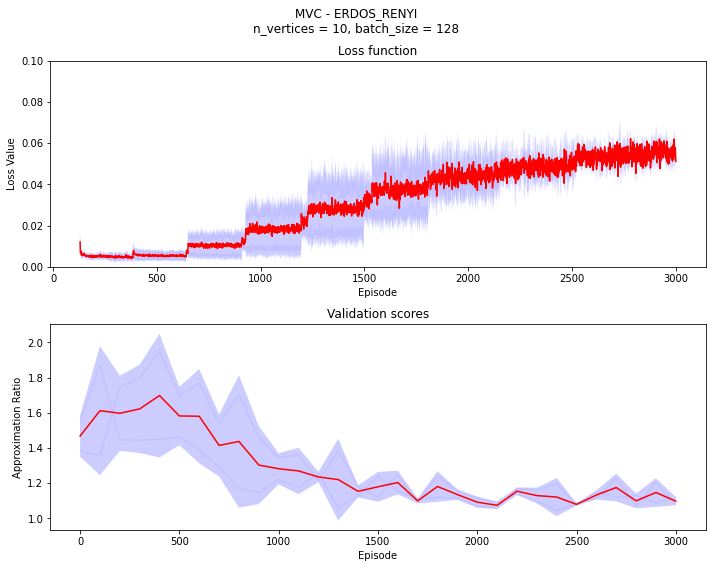

CPU times: user 30min 18s, sys: 18.3 s, total: 30min 36s
Wall time: 4min 35s


In [35]:
%%time
params = {
    **mvc_base_params,
    'n_vertices': 10,
    'graph_type': GraphType.ERDOS_RENYI,
    'graph_params': {'p': 0.3},
    'eps_start': 1.00,
    'eps_end': 0.01,
    'eps_end_at_episode': 0.8,
    'warmup_steps': 1000,
    'update_params_each': 1,
    'lr_config': [[0, 1e-3], [0.05, 1e-4], [0.9, 1e-5]],
    'target_update': 'hard',
    'n_episodes': 3000,
    'double_dqn': True,
    'discount_factor': 1.0,
    'tau': 5e-3,
    'batch_size': 128,
    'update_target_each': 2000
}
experiment_idx = -1
n_runs = 2
agents = train(n_runs, params, PROBLEM, experiment_idx)

tau 0.005
update_target_each 2000
{'problem': 'mvc', 'embedding_layers': 5, 'nstep': 1, 'lr_config': [[0, 0.001], [0.05, 0.0001], [0.9, 1e-05]], 'eps_start': 1.0, 'eps_end': 0.01, 'eps_end_at_episode': 0.8, 'n_episodes': 3000, 'validate_each': 100, 'validate_at_start': True, 'print_train_metrics_each': 10, 'batch_size': 128, 'exact_solution_max_size': 20, 'discount_factor': 1.0, 'n_vertices': 10, 'graph_type': <GraphType.ERDOS_RENYI: 2>, 'graph_params': {'p': 0.3}, 'warmup_steps': 1000, 'update_params_each': 1, 'target_update': 'soft', 'double_dqn': True, 'tau': 0.005, 'update_target_each': 2000}


/home/tiago/anaconda3/lib/python3.8/site-packages/torch/nn/init.py:453: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


Starting run #1/2...


/home/tiago/anaconda3/lib/python3.8/site-packages/torch/nn/init.py:453: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


Starting run #2/2...
Min of avg validation score across episodes: 1.0558333333333334


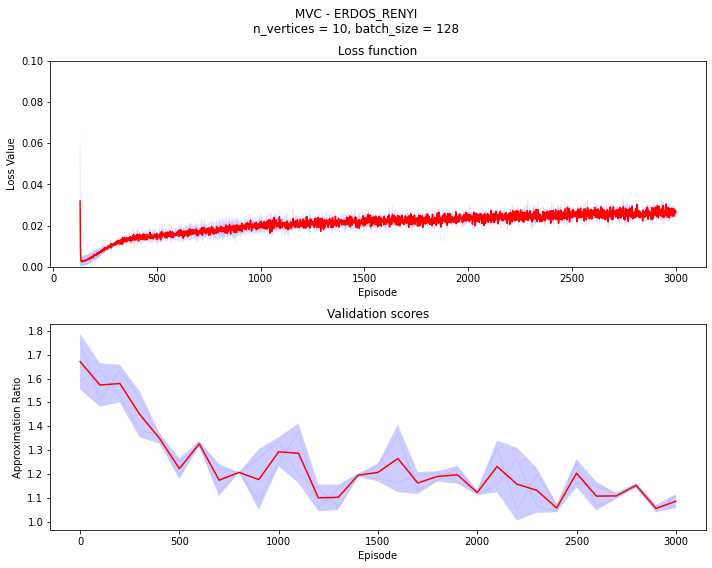

CPU times: user 29min 31s, sys: 17.1 s, total: 29min 48s
Wall time: 4min 24s


In [4]:
%%time
params = {
    **mvc_base_params,
    'n_vertices': 10,
    'graph_type': GraphType.ERDOS_RENYI,
    'graph_params': {'p': 0.3},
    'eps_start': 1.00,
    'eps_end': 0.01,
    'eps_end_at_episode': 0.8,
    'warmup_steps': 1000,
    'update_params_each': 1,
    'lr_config': [[0, 1e-3], [0.05, 1e-4], [0.9, 1e-5]],
    'target_update': 'soft',
    'n_episodes': 3000,
    'double_dqn': True,
    'discount_factor': 1.0,
    'tau': 5e-3,
    'batch_size': 128,
    'update_target_each': 2000,
}
experiment_idx = -1
n_runs = 2
agents = train(n_runs, params, PROBLEM, experiment_idx)

In [33]:
agents[0].global_t_step

19072

In [32]:
agents[0].memory.memory.maxlen

5000

In [16]:
for name, p in agents[0].qnetwork_local.named_parameters():
    print(name, p.grad.shape if p.grad is not None else None)

node_features_embedding_layer.theta1.weight torch.Size([64, 1])
edge_features_embedding_layer.theta3.weight None
edge_features_embedding_layer.theta4.weight None
embedding_layer.theta2.weight torch.Size([64, 64])
q_layer.theta5.weight torch.Size([1, 128])
q_layer.theta6.weight torch.Size([64, 64])
q_layer.theta7.weight torch.Size([64, 64])


{'problem': 'mvc', 'embedding_layers': 5, 'nstep': 1, 'lr_config': [[0, 0.001], [0.7, 0.0001]], 'eps_start': 1.0, 'eps_end': 0.01, 'eps_end_at_episode': 1.0, 'n_episodes': 2500, 'validate_each': 100, 'validate_at_start': True, 'print_train_metrics_each': 10, 'batch_size': 64, 'exact_solution_max_size': 20, 'discount_factor': 1.0, 'n_vertices': 10, 'graph_type': <GraphType.ERDOS_RENYI: 2>, 'graph_params': {'p': 0.15}}
Starting run #1/10...


/home/tiago/anaconda3/lib/python3.8/site-packages/torch/nn/init.py:453: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


Starting run #2/10...
Starting run #3/10...
Starting run #4/10...
Starting run #5/10...
Starting run #6/10...
Starting run #7/10...
Starting run #8/10...
Starting run #9/10...
Starting run #10/10...
Min of avg validation score across episodes: 1.3545


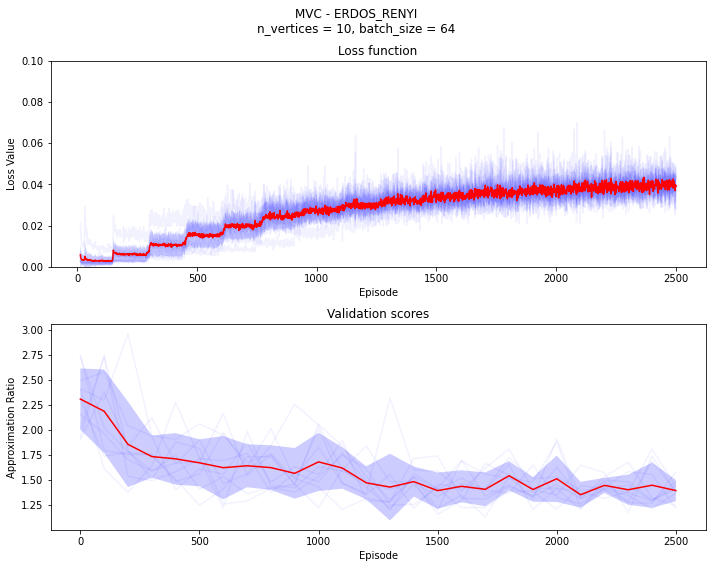

CPU times: user 1h 28min 29s, sys: 1min 17s, total: 1h 29min 46s
Wall time: 14min 11s


In [26]:
%%time
params = {
    **mvc_base_params,
    'n_vertices': 10,
    'graph_type': GraphType.ERDOS_RENYI,
    'graph_params': {'p': 0.15},
}
experiment_idx = 11
n_runs = 10
agents_11 = train(n_runs, params, PROBLEM, experiment_idx)

{'problem': 'mvc', 'embedding_layers': 5, 'nstep': 1, 'lr_config': [[0, 0.001], [0.7, 0.0001]], 'eps_start': 1.0, 'eps_end': 0.01, 'eps_end_at_episode': 1.0, 'n_episodes': 2500, 'validate_each': 100, 'validate_at_start': True, 'print_train_metrics_each': 10, 'batch_size': 64, 'exact_solution_max_size': 20, 'discount_factor': 1.0, 'n_vertices': 10, 'graph_type': <GraphType.ERDOS_RENYI: 2>, 'graph_params': {'p': 0.3}}
Starting run #1/10...


/home/tiago/anaconda3/lib/python3.8/site-packages/torch/nn/init.py:453: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


Starting run #2/10...
Starting run #3/10...
Starting run #4/10...
Starting run #5/10...
Starting run #6/10...
Starting run #7/10...
Starting run #8/10...
Starting run #9/10...
Starting run #10/10...
Min of avg validation score across episodes: 1.1068333333333331


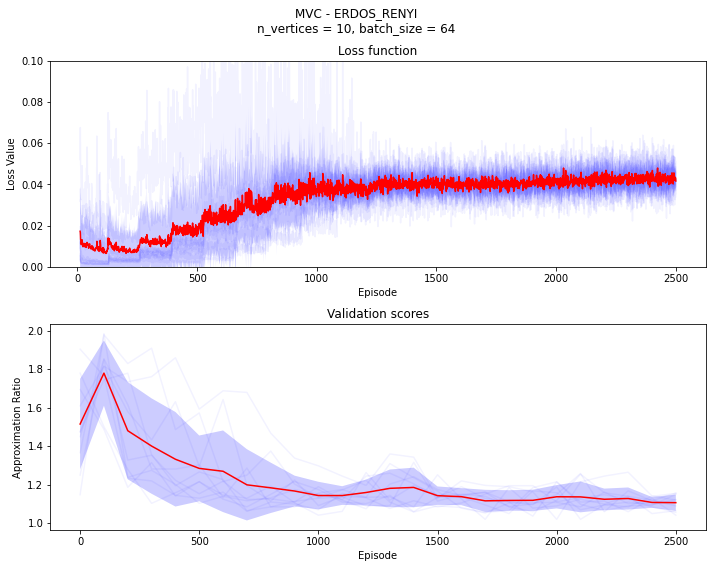

CPU times: user 1h 42min 31s, sys: 1min 31s, total: 1h 44min 3s
Wall time: 16min 33s


In [27]:
%%time
params = {
    **mvc_base_params,
    'n_vertices': 10,
    'graph_type': GraphType.ERDOS_RENYI,
    'graph_params': {'p': 0.3},
}
experiment_idx = 12
n_runs = 10
agents_12 = train(n_runs, params, PROBLEM, experiment_idx)

{'problem': 'mvc', 'embedding_layers': 5, 'nstep': 1, 'lr_config': [[0, 0.001], [0.7, 0.0001]], 'eps_start': 1.0, 'eps_end': 0.01, 'eps_end_at_episode': 1.0, 'n_episodes': 2500, 'validate_each': 100, 'validate_at_start': True, 'print_train_metrics_each': 10, 'batch_size': 64, 'exact_solution_max_size': 20, 'discount_factor': 1.0, 'n_vertices': 15, 'graph_type': <GraphType.BARABASI_ALBERT: 3>, 'graph_params': {'m': 4}}
Starting run #1/10...


/home/tiago/anaconda3/lib/python3.8/site-packages/torch/nn/init.py:453: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


Starting run #2/10...
Starting run #3/10...
Starting run #4/10...
Starting run #5/10...
Starting run #6/10...
Starting run #7/10...
Starting run #8/10...
Starting run #9/10...
Starting run #10/10...
Min of avg validation score across episodes: 1.0337222222222224


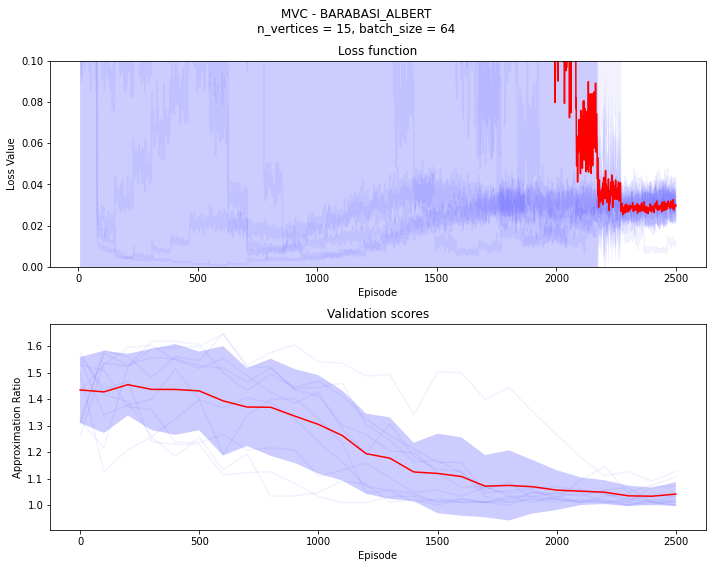

CPU times: user 3h 4min 53s, sys: 2min 3s, total: 3h 6min 57s
Wall time: 28min 14s


In [28]:
%%time
params = {
    **mvc_base_params,
    'n_vertices': 15,
    'graph_type': GraphType.BARABASI_ALBERT,
    'graph_params': {'m': 4},
}
experiment_idx = 13
n_runs = 10
agents_13 = train(n_runs, params, PROBLEM, experiment_idx)

{'problem': 'mvc', 'embedding_layers': 5, 'nstep': 1, 'lr_config': [[0, 0.001], [0.7, 0.0001]], 'eps_start': 1.0, 'eps_end': 0.01, 'eps_end_at_episode': 1.0, 'n_episodes': 2500, 'validate_each': 100, 'validate_at_start': True, 'print_train_metrics_each': 10, 'batch_size': 64, 'exact_solution_max_size': 20, 'discount_factor': 1.0, 'n_vertices': 15, 'graph_type': <GraphType.ERDOS_RENYI: 2>, 'graph_params': {'p': 0.15}}
Starting run #1/10...


/home/tiago/anaconda3/lib/python3.8/site-packages/torch/nn/init.py:453: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


Starting run #2/10...
Starting run #3/10...
Starting run #4/10...
Starting run #5/10...
Starting run #6/10...
Starting run #7/10...
Starting run #8/10...
Starting run #9/10...
Starting run #10/10...
Min of avg validation score across episodes: 1.1758809523809524


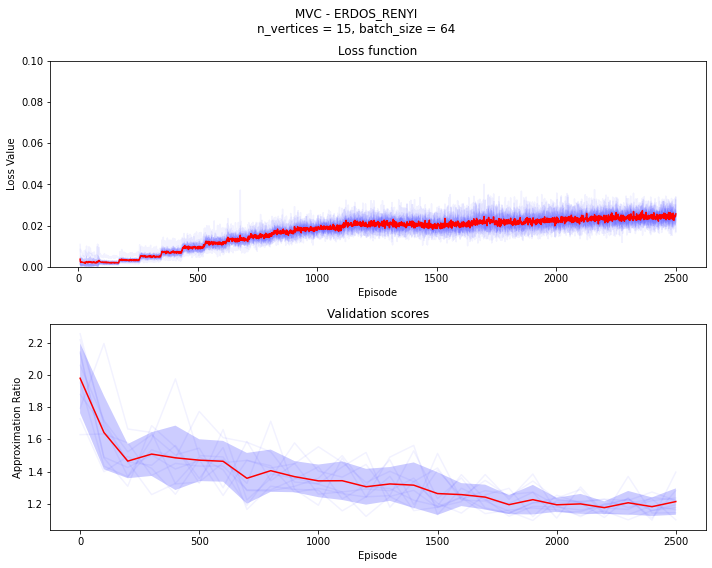

CPU times: user 2h 33min 1s, sys: 2min 39s, total: 2h 35min 41s
Wall time: 25min 34s


In [29]:
%%time
params = {
    **mvc_base_params,
    'n_vertices': 15,
    'graph_type': GraphType.ERDOS_RENYI,
    'graph_params': {'p': 0.15},
}
experiment_idx = 14
n_runs = 10
agents_14 = train(n_runs, params, PROBLEM, experiment_idx)

{'problem': 'mvc', 'embedding_layers': 5, 'nstep': 1, 'lr_config': [[0, 0.001], [0.7, 0.0001]], 'eps_start': 1.0, 'eps_end': 0.01, 'eps_end_at_episode': 1.0, 'n_episodes': 2500, 'validate_each': 100, 'validate_at_start': True, 'print_train_metrics_each': 10, 'batch_size': 64, 'exact_solution_max_size': 20, 'discount_factor': 1.0, 'n_vertices': 15, 'graph_type': <GraphType.ERDOS_RENYI: 2>, 'graph_params': {'p': 0.3}}
Starting run #1/10...


/home/tiago/anaconda3/lib/python3.8/site-packages/torch/nn/init.py:453: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


Starting run #2/10...
Starting run #3/10...
Starting run #4/10...
Starting run #5/10...
Starting run #6/10...
Starting run #7/10...
Starting run #8/10...
Starting run #9/10...
Starting run #10/10...
Min of avg validation score across episodes: 1.0895833333333331


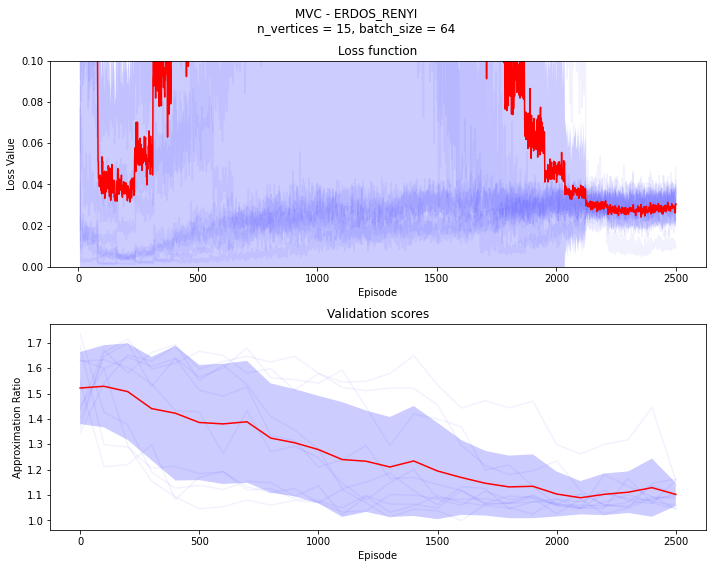

CPU times: user 3h 2min 26s, sys: 3min 15s, total: 3h 5min 41s
Wall time: 30min 49s


In [30]:
%%time
params = {
    **mvc_base_params,
    'n_vertices': 15,
    'graph_type': GraphType.ERDOS_RENYI,
    'graph_params': {'p': 0.3},
}
experiment_idx = 15
n_runs = 10
agents_15 = train(n_runs, params, PROBLEM, experiment_idx)

{'problem': 'mvc', 'embedding_layers': 5, 'nstep': 1, 'lr_config': [[0, 0.001], [0.7, 0.0001]], 'eps_start': 1.0, 'eps_end': 0.01, 'eps_end_at_episode': 1.0, 'n_episodes': 2500, 'validate_each': 100, 'validate_at_start': True, 'print_train_metrics_each': 10, 'batch_size': 64, 'exact_solution_max_size': 20, 'discount_factor': 1.0, 'n_vertices': 20, 'graph_type': <GraphType.BARABASI_ALBERT: 3>, 'graph_params': {'m': 4}}
Starting run #1/10...


/home/tiago/anaconda3/lib/python3.8/site-packages/torch/nn/init.py:453: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


Starting run #2/10...
Starting run #3/10...
Starting run #4/10...
Starting run #5/10...
Starting run #6/10...
Starting run #7/10...
Starting run #8/10...
Starting run #9/10...
Starting run #10/10...
Min of avg validation score across episodes: 1.2262237762237764


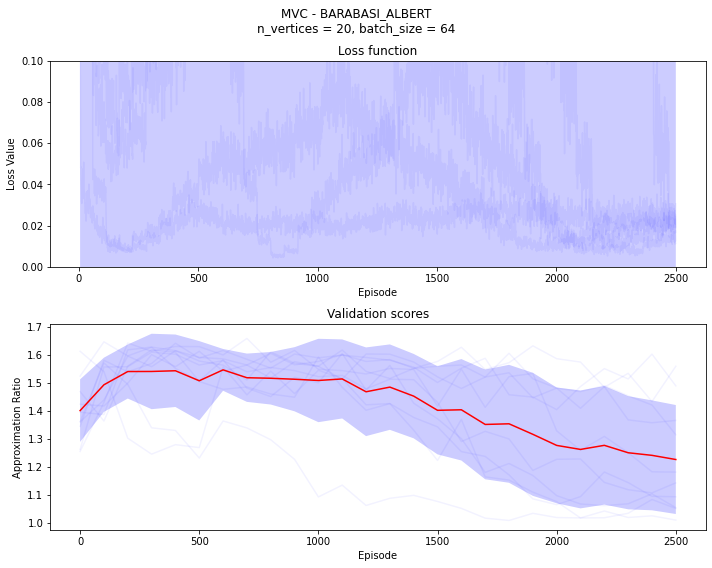

CPU times: user 4h 38min 43s, sys: 4min 21s, total: 4h 43min 4s
Wall time: 45min 35s


In [31]:
%%time
params = {
    **mvc_base_params,
    'n_vertices': 20,
    'graph_type': GraphType.BARABASI_ALBERT,
    'graph_params': {'m': 4},
}
experiment_idx = 16
n_runs = 10
agents_16 = train(n_runs, params, PROBLEM, experiment_idx)

{'problem': 'mvc', 'embedding_layers': 5, 'nstep': 1, 'lr_config': [[0, 0.001], [0.7, 0.0001]], 'eps_start': 1.0, 'eps_end': 0.01, 'eps_end_at_episode': 1.0, 'n_episodes': 2500, 'validate_each': 100, 'validate_at_start': True, 'print_train_metrics_each': 10, 'batch_size': 64, 'exact_solution_max_size': 20, 'discount_factor': 1.0, 'n_vertices': 20, 'graph_type': <GraphType.ERDOS_RENYI: 2>, 'graph_params': {'p': 0.15}}
Starting run #1/10...


/home/tiago/anaconda3/lib/python3.8/site-packages/torch/nn/init.py:453: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


Starting run #2/10...
Starting run #3/10...
Starting run #4/10...
Starting run #5/10...
Starting run #6/10...
Starting run #7/10...
Starting run #8/10...
Starting run #9/10...
Starting run #10/10...
Min of avg validation score across episodes: 1.1006998556998555


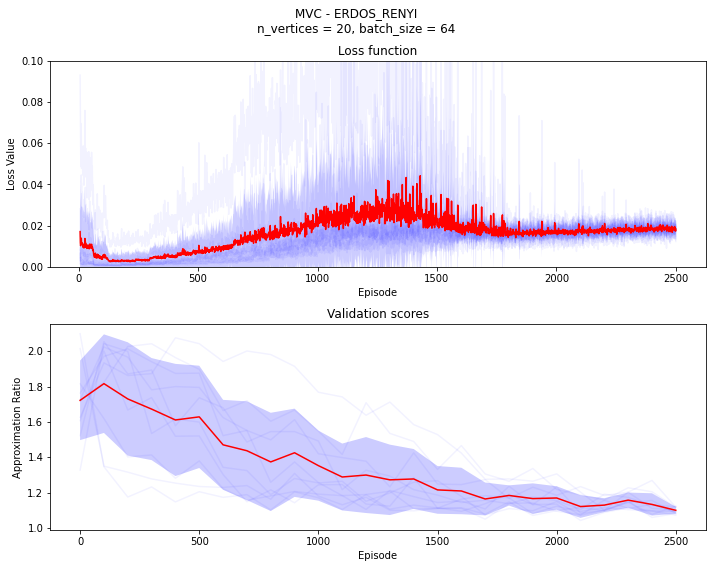

CPU times: user 3h 47min 42s, sys: 5min 32s, total: 3h 53min 15s
Wall time: 41min 46s


In [32]:
%%time
params = {
    **mvc_base_params,
    'n_vertices': 20,
    'graph_type': GraphType.ERDOS_RENYI,
    'graph_params': {'p': 0.15},
}
experiment_idx = 17
n_runs = 10
agents_17 = train(n_runs, params, PROBLEM, experiment_idx)

{'problem': 'mvc', 'embedding_layers': 5, 'nstep': 1, 'lr_config': [[0, 0.001], [0.7, 0.0001]], 'eps_start': 1.0, 'eps_end': 0.01, 'eps_end_at_episode': 1.0, 'n_episodes': 2500, 'validate_each': 100, 'validate_at_start': True, 'print_train_metrics_each': 10, 'batch_size': 64, 'exact_solution_max_size': 20, 'discount_factor': 1.0, 'n_vertices': 20, 'graph_type': <GraphType.ERDOS_RENYI: 2>, 'graph_params': {'p': 0.3}}
Starting run #1/10...


/home/tiago/anaconda3/lib/python3.8/site-packages/torch/nn/init.py:453: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


Starting run #2/10...
Starting run #3/10...
Starting run #4/10...
Starting run #5/10...
Starting run #6/10...
Starting run #7/10...
Starting run #8/10...
Starting run #9/10...
Starting run #10/10...
Min of avg validation score across episodes: 1.1511188811188808


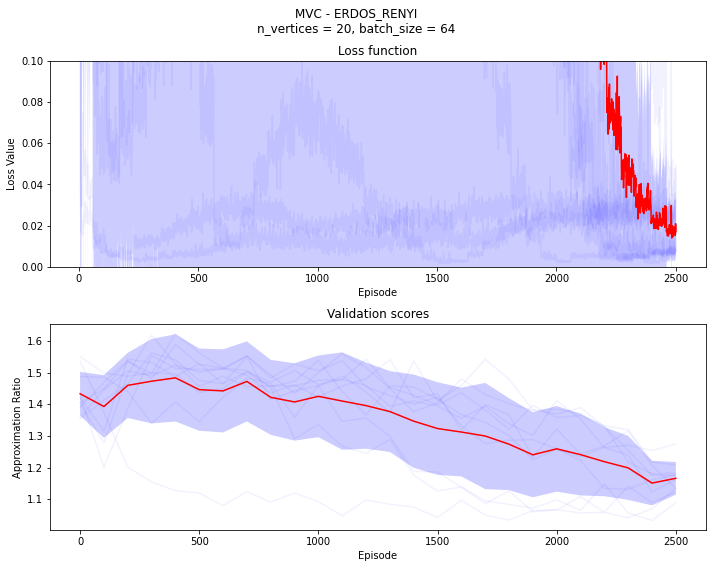

CPU times: user 4h 36min 25s, sys: 6min 47s, total: 4h 43min 13s
Wall time: 50min 57s


In [33]:
%%time
params = {
    **mvc_base_params,
    'n_vertices': 20,
    'graph_type': GraphType.ERDOS_RENYI,
    'graph_params': {'p': 0.3},
}
experiment_idx = 18
n_runs = 10
agents_18 = train(n_runs, params, PROBLEM, experiment_idx)

In [39]:
for p in agents_18[0].qnetwork_local.parameters():
    print(p.shape)

torch.Size([64, 1])
torch.Size([64, 64])
torch.Size([64, 0])
torch.Size([64, 64])
torch.Size([1, 128])
torch.Size([64, 64])
torch.Size([64, 64])


config_parsed="{'problem': 'mvc', 'embedding_layers': 5, 'nstep': 2, 'lr_config': [[0, 0.001], [0.7, 0.0001]], 'eps_start': 1.0, 'eps_end': 0.01, 'eps_end_at_episode': 1.0, 'n_episodes': 1500, 'validate_each': 100, 'validate_at_start': True, 'print_train_metrics_each': 10, 'batch_size': 64, 'exact_solution_max_size': 20, 'discount_factor': 1.0, 'n_vertices': 20, 'graph_type': 2, 'graph_params': {'p': 0.3}}"
Min of avg validation score across episodes: 1.3264122544122545


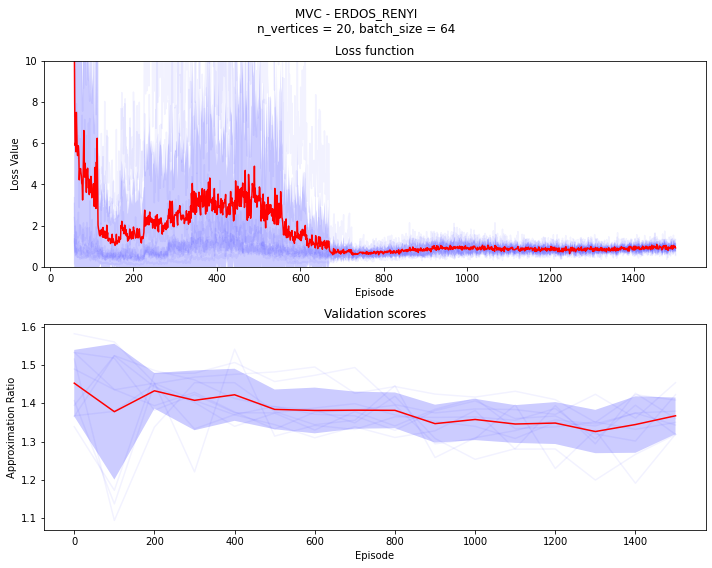

In [18]:
replay_graphs(PROBLEM, 9, 10)

config_parsed="{'problem': 'mvc', 'embedding_layers': 5, 'nstep': 2, 'lr_config': [[0, 0.001], [0.7, 0.0001]], 'eps_start': 1.0, 'eps_end': 0.01, 'eps_end_at_episode': 1.0, 'n_episodes': 2500, 'validate_each': 100, 'validate_at_start': True, 'print_train_metrics_each': 10, 'batch_size': 64, 'exact_solution_max_size': 20, 'discount_factor': 1.0, 'n_vertices': 20, 'graph_type': 2, 'graph_params': {'p': 0.3}}"
Min of avg validation score across episodes: 1.3264122544122545


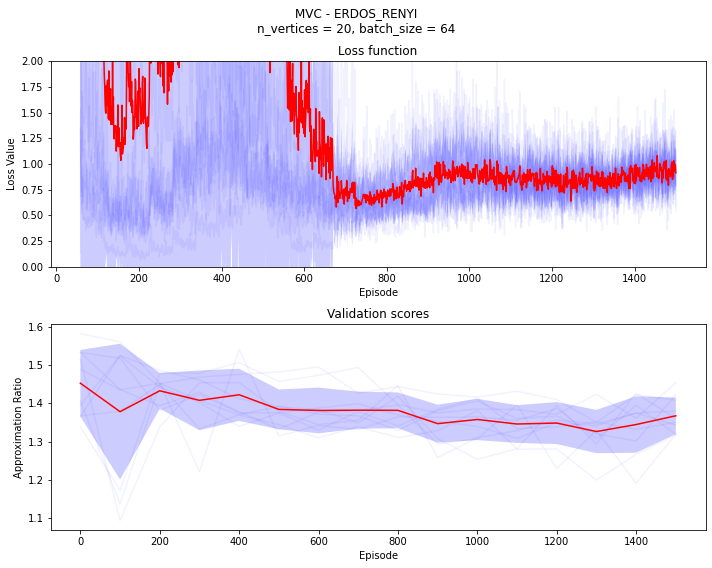

In [22]:
replay_graphs(PROBLEM, 9, 2, save_img="outputs-mvc/run_9.png")

In [ ]:
%%time
params = {
    **mvc_base_params,
    'n_vertices': 10,
    'graph_type': GraphType.ERDOS_RENYI,
    'graph_params': {'p': 0.15},
    'embedding_layers': 4
}
experiment_idx = 19
n_runs = 10
agents_19 = train(n_runs, params, PROBLEM, experiment_idx)

{'problem': 'mvc', 'embedding_layers': 4, 'nstep': 1, 'lr_config': [[0, 0.001], [0.7, 0.0001]], 'eps_start': 1.0, 'eps_end': 0.01, 'eps_end_at_episode': 1.0, 'n_episodes': 2500, 'validate_each': 100, 'validate_at_start': True, 'print_train_metrics_each': 10, 'batch_size': 64, 'exact_solution_max_size': 20, 'discount_factor': 1.0, 'n_vertices': 10, 'graph_type': <GraphType.ERDOS_RENYI: 2>, 'graph_params': {'p': 0.15}}
Starting run #1/10...


/home/tiago/anaconda3/lib/python3.8/site-packages/torch/nn/init.py:453: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


Starting run #2/10...
Starting run #3/10...


config_parsed="{'problem': 'mvc', 'embedding_layers': 5, 'nstep': 2, 'lr_config': [[0, 0.001], [0.5, 0.0001], [0.75, 1e-05]], 'eps_start': 1.0, 'eps_end': 0.01, 'eps_end_at_episode': 0.95, 'n_episodes': 5000, 'validate_each': 100, 'print_train_metrics_each': 10, 'batch_size': 64, 'exact_solution_max_size': 20, 'graph_type': 3, 'n_vertices': 10, 'graph_params': {'m': 4}}"
Min of avg validation score across episodes: 1.0


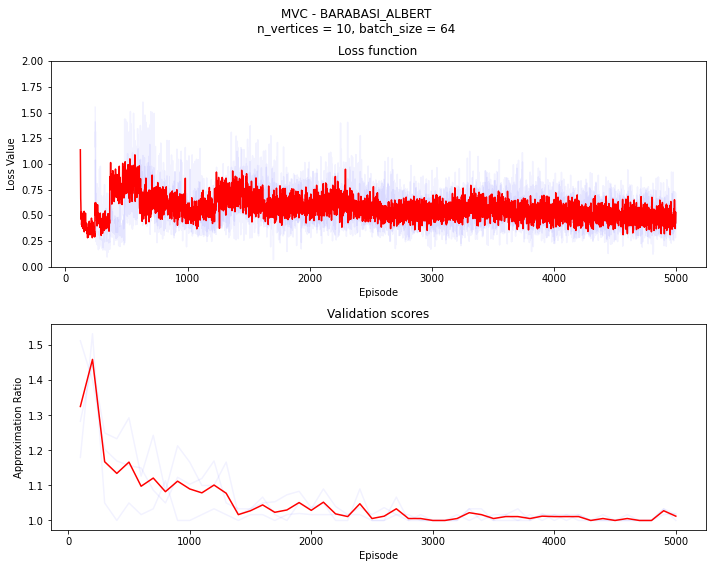

In [10]:
replay_graphs(PROBLEM, 1, 2)

{'problem': 'mvc', 'embedding_layers': 5, 'nstep': 2, 'lr_config': [[0, 0.001], [0.5, 0.0001], [0.75, 1e-05]], 'eps_start': 1.0, 'eps_end': 0.0, 'eps_end_at_episode': 1.0, 'n_episodes': 1000, 'validate_each': 20, 'print_train_metrics_each': 10, 'batch_size': 64, 'exact_solution_max_size': 20, 'graph_type': <GraphType.BARABASI_ALBERT: 3>, 'n': 10, 'graph_params': {'m': 4}}
Starting run #1/3...


/home/tiago/anaconda3/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
/home/tiago/anaconda3/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:216: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn(


len(agent.losses)=1001
Starting run #2/3...
len(agent.losses)=1001
Starting run #3/3...
len(agent.losses)=1001
losses_df.shape=(1001, 3)
first_non_zero_idx=11
losses_df.iloc[:,0]=11      0.098987
12      0.068768
13      0.063977
14      0.064344
15      0.066068
          ...   
996     0.076465
997     0.071893
998     0.078446
999     0.098002
1000    0.109652
Name: 0, Length: 990, dtype: float64
Min of avg validation score across episodes: 1.0


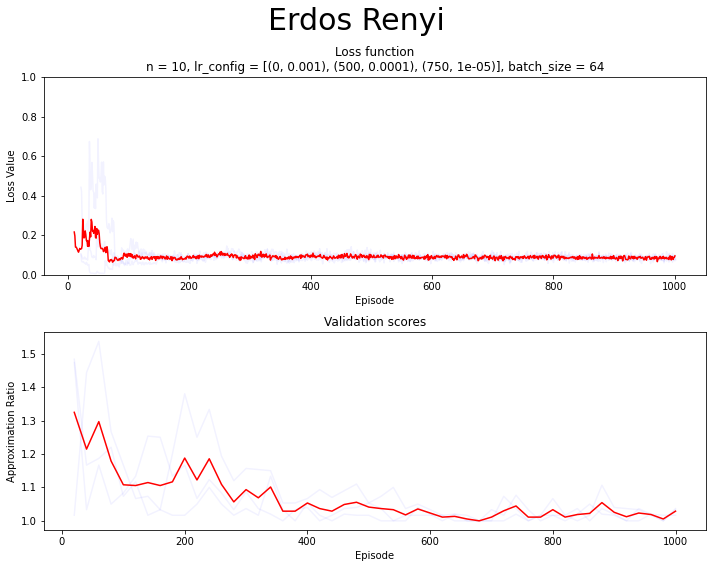

CPU times: user 13min 59s, sys: 36.7 s, total: 14min 36s
Wall time: 3min 24s


In [18]:
%%time
params = {
    **mvc_base_params,
    'graph_type': GraphType.BARABASI_ALBERT,
    'n_vertices': 10,
    'n_episodes': 5000,
    'graph_params': {'m': 4},
}
experiment_idx = 1
n_runs = 3
agents = train(n_runs, params, PROBLEM, experiment_idx)

{'problem': 'mvc', 'embedding_layers': 5, 'nstep': 2, 'lr_config': [[0, 0.001], [0.5, 0.0001], [0.75, 1e-05]], 'eps_start': 1.0, 'eps_end': 0.0, 'eps_end_at_episode': 1.0, 'n_episodes': 200, 'validate_each': 20, 'print_train_metrics_each': 10, 'batch_size': 64, 'exact_solution_max_size': 20, 'graph_type': <GraphType.BARABASI_ALBERT: 3>, 'n_vertices': 10, 'graph_params': {'m': 4}}
Starting run #1/3...
Starting run #2/3...
Starting run #3/3...
Min of avg validation score across episodes: 1.0444444444444445


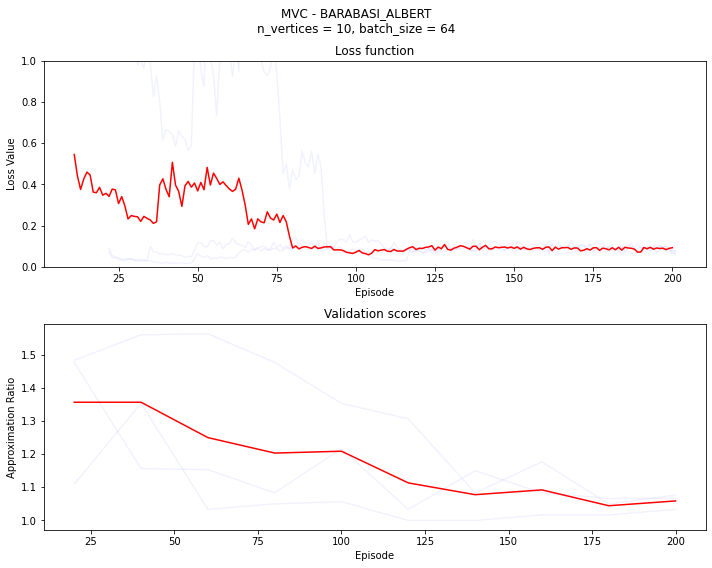

CPU times: user 2min 48s, sys: 8.27 s, total: 2min 56s
Wall time: 41.9 s


In [36]:
%%time
params = {
    **mvc_base_params,
    'graph_type': GraphType.BARABASI_ALBERT,
    'n_vertices': 10,
    'graph_params': {'m': 4},
    'n_episodes': 200,
    'validate_each': 20,
}
experiment_idx = 3
n_runs = 3
agents = train(n_runs, params, PROBLEM, experiment_idx)

{'problem': 'mvc', 'embedding_layers': 5, 'nstep': 2, 'lr_config': [[0, 0.001], [0.5, 0.0001], [0.75, 1e-05]], 'eps_start': 1.0, 'eps_end': 0.0, 'eps_end_at_episode': 1.0, 'n_episodes': 2000, 'validate_each': 100, 'print_train_metrics_each': 10, 'batch_size': 64, 'exact_solution_max_size': 20, 'graph_type': <GraphType.BARABASI_ALBERT: 3>, 'n_vertices': 20, 'graph_params': {'m': 4}}
Starting run #1/10...
Starting run #2/10...
Starting run #3/10...
Starting run #4/10...
Starting run #5/10...
Starting run #6/10...
Starting run #7/10...
Starting run #8/10...
Starting run #9/10...
Starting run #10/10...
Min of avg validation score across episodes: 1.0349242424242422


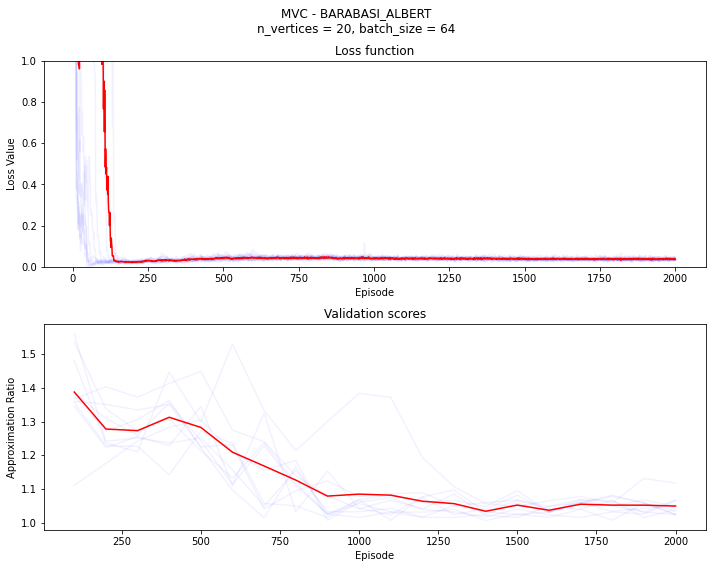

CPU times: user 3h 36min 6s, sys: 1min 25s, total: 3h 37min 31s
Wall time: 31min 17s


In [37]:
%%time
params = {
    **mvc_base_params,
    'graph_type': GraphType.BARABASI_ALBERT,
    'n_vertices': 20,
    'graph_params': {'m': 4},
    'n_episodes': 2000,
    'validate_each': 100,
}
experiment_idx = 4
n_runs = 10
agents = train(n_runs, params, PROBLEM, experiment_idx)

{'problem': 'mvc', 'embedding_layers': 5, 'nstep': 2, 'lr_config': [[0, 0.001], [0.5, 0.0001], [0.75, 1e-05]], 'eps_start': 1.0, 'eps_end': 0.0, 'eps_end_at_episode': 1.0, 'n_episodes': 2000, 'validate_each': 100, 'print_train_metrics_each': 10, 'batch_size': 64, 'exact_solution_max_size': 20, 'graph_type': <GraphType.ERDOS_RENYI: 2>, 'n_vertices': 20, 'graph_params': {'p': 0.4}}
Starting run #1/10...
Starting run #2/10...
Starting run #3/10...
Starting run #4/10...
Starting run #5/10...
Starting run #6/10...
Starting run #7/10...
Starting run #8/10...
Starting run #9/10...
Starting run #10/10...
Min of avg validation score across episodes: 1.0590641025641023


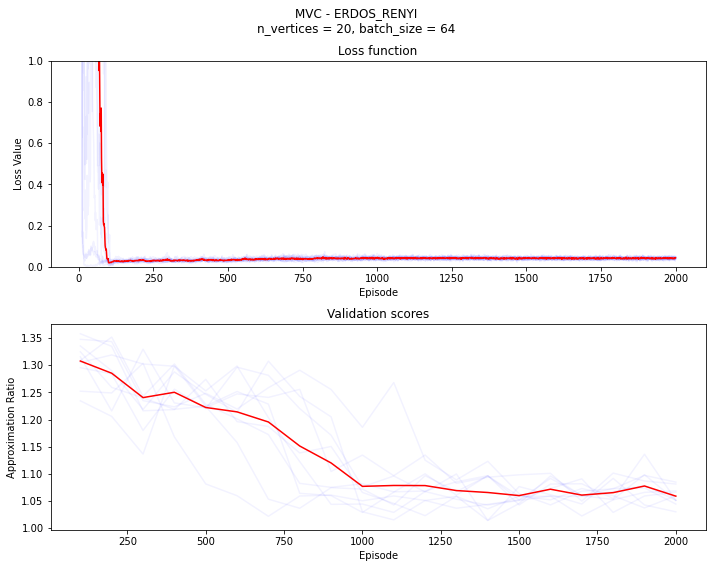

CPU times: user 3h 56min 28s, sys: 2min 26s, total: 3h 58min 55s
Wall time: 36min 11s


In [38]:
%%time
params = {
    **mvc_base_params,
    'graph_type': GraphType.ERDOS_RENYI,
    'n_vertices': 20,
    'graph_params': {'p': 0.4},
    'n_episodes': 2000,
    'validate_each': 100,
}
experiment_idx = 5
n_runs = 10
agents_er = train(n_runs, params, PROBLEM, experiment_idx)

{'problem': 'mvc', 'embedding_layers': 5, 'nstep': 2, 'lr_config': [[0, 0.001], [0.5, 0.0001], [0.75, 1e-05]], 'eps_start': 1.0, 'eps_end': 0.0, 'eps_end_at_episode': 1.0, 'n_episodes': 2000, 'validate_each': 100, 'print_train_metrics_each': 10, 'batch_size': 64, 'exact_solution_max_size': 20, 'graph_type': <GraphType.ERDOS_RENYI: 2>, 'n_vertices': 20, 'graph_params': {'p': 0.3}}
Starting run #1/10...
Starting run #2/10...
Starting run #3/10...
Starting run #4/10...
Starting run #5/10...
Starting run #6/10...
Starting run #7/10...
Starting run #8/10...
Starting run #9/10...
Starting run #10/10...
Min of avg validation score across episodes: 1.067704462204462


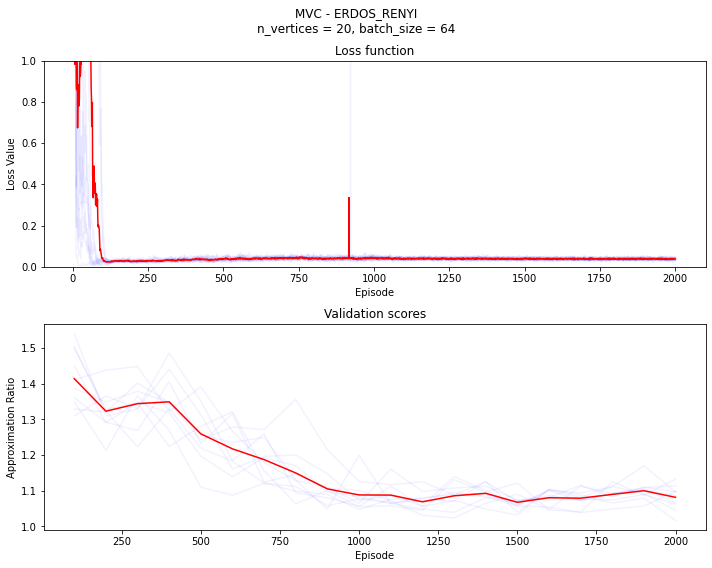

CPU times: user 3h 44min 38s, sys: 3min 27s, total: 3h 48min 6s
Wall time: 36min 47s


In [39]:
%%time
params = {
    **mvc_base_params,
    'graph_type': GraphType.ERDOS_RENYI,
    'n_vertices': 20,
    'graph_params': {'p': 0.3},
    'n_episodes': 2000,
    'validate_each': 100,
}
experiment_idx = 6
n_runs = 10
agents_er_2 = train(n_runs, params, PROBLEM, experiment_idx)

In [42]:
s = """{'n': 20, 'nstep': 2, 'lr_config': [[0, 0.001], [0.5, 0.0001], [0.75, 1e-05]], 'graph_type': <GraphType.BARABASI_ALBERT: 3>, 'graph_type2': <GraphType.BARABASI_ALBERT: 3>, 'graph_params': {'m': 4}, 'n_episodes': 100, 'eps_start': 1.0, 'eps_end': 0.05, 'eps_end_at_episode': 1.0, 'validate_each': 10, 'print_train_metrics_each': 10, 'batch_size': 16, 'exact_solution_max_size': 20}"""

In [47]:
re.sub(r"('graph_type'): <[^\s]+:\s([^>]+)>", r"\1: \2", s)

"{'n': 20, 'nstep': 2, 'lr_config': [[0, 0.001], [0.5, 0.0001], [0.75, 1e-05]], 'graph_type': 3, 'graph_type2': <GraphType.BARABASI_ALBERT: 3>, 'graph_params': {'m': 4}, 'n_episodes': 100, 'eps_start': 1.0, 'eps_end': 0.05, 'eps_end_at_episode': 1.0, 'validate_each': 10, 'print_train_metrics_each': 10, 'batch_size': 16, 'exact_solution_max_size': 20}"

In [45]:
GraphType(3).name

'BARABASI_ALBERT'

In [11]:
import numpy as np
import pandas as pd

In [23]:
data = np.random.random((3, 10))
df = pd.DataFrame(data.T)
df.std?

In [30]:
pd.Series([1,2,3,4]).values

array([1, 2, 3, 4])

In [42]:
neg = True
rew = 10
rew * (1-2*neg)

-10

In [5]:
from s2v_dqn.instances.instance_generator import InstanceGenerator
from s2v_dqn.agents.s2v_dqn.dqn_agent import DQNAgent
from s2v_dqn.envs.mvc.mvc_env import MVCEnv
import networkx as nx

In [14]:
gp = {'p': 0.3}
ig = InstanceGenerator(10, 10, GraphType.ERDOS_RENYI, graph_params=gp)

In [23]:
for i in range(1, ):
    seed = abs(hash(f"{PROBLEM}_{2}_{7}_{400}_val_{i}"))
    g = ig.generate_graph(seed)
    print(g.number_of_edges(), nx.is_connected(g))

8 False


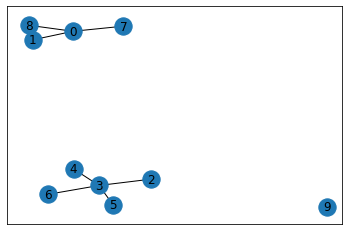

In [24]:
nx.draw_networkx(g)

In [17]:
nx.is_connected(g)

True